In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns

In [3]:
import python.dataset_analysis
from python.load import *

In [4]:
import json

## Carga resultados 

In [9]:
squad_train = pd.read_excel('datasets/squad/models/NER-POS-F-SQUAD-train-queries.xlsx')

In [23]:
squad_train.columns

Index(['title', 'id', 'query', 'answer', 'impossible', 'plausible', 'dataset',
       'context', 'query_ner', 'context_ner', 'answer_ner', 'query_pos',
       'answer_pos', 'plausible_pos', 'context_pos', 'foco'],
      dtype='object')

In [24]:
print(len(squad_train))

130319


### Entidades detectadas

In [40]:
NER_TYPES = ['ORGANIZATION',  'PERSON',  
             'CITY',  'COUNTRY',  'LOCATION', 'NATIONALITY', 
             'DATE',  'DURATION',  'TIME',
             'PERCENT',  'NUMBER',  'ORDINAL',  'MONEY',
             'MISC',  'URL',  
             'CAUSE_OF_DEATH',  'STATE_OR_PROVINCE',  'CRIMINAL_CHARGE',  'RELIGION',  'TITLE',   'SET',  'IDEOLOGY' ]

count_types_ner_df = pd.DataFrame({'type': NER_TYPES}).set_index('type')

#### Análisis para pregunta, respuesta y contexto

In [130]:
#COLUMN = 'answer_ner'
COLUMN = 'query_ner'
COLUMN = 'context_ner'

In [131]:
count_ner = []
for specific_ner in NER_TYPES:
    count_ner.append(sum(pd.Series(squad_train[COLUMN].unique()).apply(lambda x: get_ner_count(load_data(x), specific_ner))))

In [132]:
count_types_ner = pd.DataFrame({'type': NER_TYPES, COLUMN+'_count': count_ner}).set_index('type')
count_types_ner_df = pd.concat([count_types_ner_df, count_types_ner], axis=1)
count_types_ner_df.fillna(0,inplace=True)

In [133]:
count_types_ner_df

answer_ner_count  query_ner_count  context_ner_count
type                                                                   
ORGANIZATION                   3626            10351              26066
PERSON                        10445            16057              33263
CITY                           1771             5468              14872
COUNTRY                        1807             7645              19421
LOCATION                       2458             6612              20953
NATIONALITY                    1482             5809              17302
DATE                           4887            11753              39186
DURATION                        783             5536               5825
TIME                             97              233                798
PERCENT                         102               36                546
NUMBER                         5007             5416              35552
ORDINAL                         448             3163               7151
MONEY                           698              180               1629
MISC                           1855             7592              20122
URL                              20               15                 57
CAUSE_OF_DEATH                  471             2281               5536
STATE_OR_PROVINCE               601             1697               4208
CRIMINAL_CHARGE                 157              484               1266
RELIGION                        495             1831               5564
TITLE                          1914             6880              15741
SET                             147              543               1460
IDEOLOGY                        367              931               2858

In [191]:
#count_types_ner_df.to_excel('datasets/squad/ner/squad-train-ner-all-count.xlsx')

In [1998]:
count_types_ner_df = pd.read_excel('datasets/squad/ner/squad-train-ner-all-count.xlsx')

In [1893]:
NER_TYPES = count_types_ner_df['type']

#### Gráficas NER

In [1865]:
fig = px.bar(count_types_ner_df.reset_index().sort_values('type'), x='type', 
             y=["context_ner_count", "query_ner_count", "answer_ner_count"], 
             title="Count of NER in SQuAD train 2.0")
fig.show()

In [50]:
#fig = px.pie(count_types_ner_df.reset_index().sort_values('type'), names='type', values='context_ner_count',
#             title='Proportion of distinct NER in Contexts of SQuAD train 2.0')
#fig.show()

In [51]:
#fig = px.pie(count_types_ner_df.reset_index().sort_values('type'), names='type', values='query_ner_count',
#             title='Proportion of distinct NER in Questions of SQuAD train 2.0')
#fig.show()

In [1866]:
fig = px.pie(count_types_ner_df.reset_index().sort_values('type'), names='type', values='answer_ner_count',
             title='Proporción de entidades en las respuestas de SQuAD train 2.0')
fig.show()

#### Agregar entidades por tipo

In [1895]:
COLUMN = 'answer_ner'
#COLUMN = 'query_ner'
#COLUMN = 'context_ner'

In [1896]:
values_ner = []
for specific_ner in NER_TYPES:
    values_ner.append(sum(pd.Series(squad_train[COLUMN].unique()).apply(lambda x: get_ner_values(load_data(x), specific_ner)), []))

In [1898]:
count_types_ner = pd.DataFrame({'type': NER_TYPES, COLUMN+'_values': values_ner}).set_index('type')
count_types_ner_df = pd.concat([count_types_ner_df, count_types_ner], axis=1)

In [1904]:
count_types_ner_df.head()

type  answer_ner_count  query_ner_count  context_ner_count  \
0  ORGANIZATION            3626.0          10351.0            26066.0   
1        PERSON           10445.0          16057.0            33263.0   
2          CITY            1771.0           5468.0            14872.0   
3       COUNTRY            1807.0           7645.0            19421.0   
4      LOCATION            2458.0           6612.0            20953.0   

                                  context_ner_values  \
0  ['Destiny', 'Golden Globe', 'Cadillac Records'...   
1  ['Beyoncé Giselle Knowles Carter', 'Mathew Kno...   
2  ['Houston', 'Houston', 'Fredericksburg', 'Hous...   
3  ['America', 'U.S.', 'U.S.', 'US', 'UK Norway',...   
4  ['Northern', 'Europe', 'North', 'Reliant Stadi...   

                                    query_ner_values  \
0  ['Recording Industry Association of America', ...   
1  ['Beyonce', 'Beyonce', 'Beyonce', 'Beyoncé', '...   
2  ['Austin', 'Roseland', 'Atlantic City', 'Londo...   
3  ['Cuba', 'Cuba', 'U.S.', 'China', 'United Stat...   
4  ['Powers', 'Europe', 'U.K.', 'Dreamgirls', 'Vo...   

                                   answer_ner_values  
0  ['Cadillac Records', 'Xerox', "St. John 's Uni...  
1  ['Mathew Knowles', 'Jay Z', 'Beyoncé', 'Sasha ...  
2  ['Houston', 'Fredericksburg', 'Houston', 'Rose...  
3  ['UK Norway', 'Belgium', 'China', 'America', '...  
4  ['Great Wall of', 'Ballroom', 'Lenox Hill Hosp...

In [85]:
#count_types_ner_df.to_excel('analysis//squad-train-type_ner.xlsx')

#### Entidades frecuentes en pregunta, respuesta y contexto

In [1906]:
from python.dataset_analysis import generate_word_cloud, preprocess_text

In [1999]:
count_types_ner_df['query_ner_values'] = count_types_ner_df['query_ner_values'].fillna('')
count_types_ner_df['query_ner_values'] = count_types_ner_df['query_ner_values'].apply(lambda x: str(';'.join(list(set(x.split(', '))))))
count_types_ner_df['context_ner_values'] = count_types_ner_df['context_ner_values'].fillna('')
count_types_ner_df['context_ner_values'] = count_types_ner_df['context_ner_values'].apply(lambda x: str(';'.join(list(set(x.split(', '))))))
count_types_ner_df['answer_ner_values'] = count_types_ner_df['answer_ner_values'].fillna('')
count_types_ner_df['answer_ner_values'] = count_types_ner_df['answer_ner_values'].apply(lambda x: str(';'.join(list(set(x.split(', '))))))

In [2000]:
all_ner_values = list(count_types_ner_df['context_ner_values'].values) + list(count_types_ner_df['query_ner_values'].values) + list(count_types_ner_df['answer_ner_values'].values)

In [2001]:
all_ner_values = str(', '.join(all_ner_values)).replace("'",'').replace('[', '').replace(']','').replace('"','').replace('{','').replace('}','')
all_ner_values= all_ner_values.replace(' ', '_')

In [2002]:
all_ner_values

'Telescope_Inc;NBA;Chopin_Liszt;MetLife_Stadium;Heartbreak;Ministry_of_Education;M.R._Narisa_Chakrabongse_Green_World_Foundation_GWF;Herald;Institute_of_Technology_the_Berg_Schola_Bergschule;PLA;Green_Light;RWTH_Aachen;Paris_Fashion_Week;Economist;Warsaw_Lyceum;Manhattan_/_Citywide_Brooklyn_and_Staten_Island_Fire_Communications;Holy_Cross;WikiLeaks;Juyuan_Middle_School;New_York_Giants;Mantrayāna_Tantrayāna_Tantric_Buddhism;Hearst_Corporation_AOL;Higher_Education_&_Training_Awards_Council;Hewlett_Packard_HP;Foreign_Ministry;Anti_Defamation_League;VMA;Ellis_Island_Immigration_Museum;Celgene_General_Electric_Ventures;National_Memorial_Grant_s_Tomb_African_Burial_Ground_National_Monument_and_Hamilton_Grange_National_Memorial;The_Institute_for_Genomic_Research;La_Anunciada;Bureau_of_Telecommunications_Regulation;Authority;United_States_District_Court;Cinemark;FDNY;Civil_Service;Ford;Elektra_Records;People_s_Republic;Wall_Street_Journal_The_New_York_Times_the_International_Herald_Tribune;Hon

In [2007]:
from wordcloud import WordCloud
def generate_word_cloud(text_str, max_words=15, colormap='viridis', stopwords=[]):
	word_cloud = WordCloud(max_font_size=50, background_color='white', max_words=max_words, stopwords=stopwords, colormap=colormap).generate(text_str)
	plt.figure(figsize=(50,50))
	plt.imshow(word_cloud)
	plt.axis('off')
	plt.show()

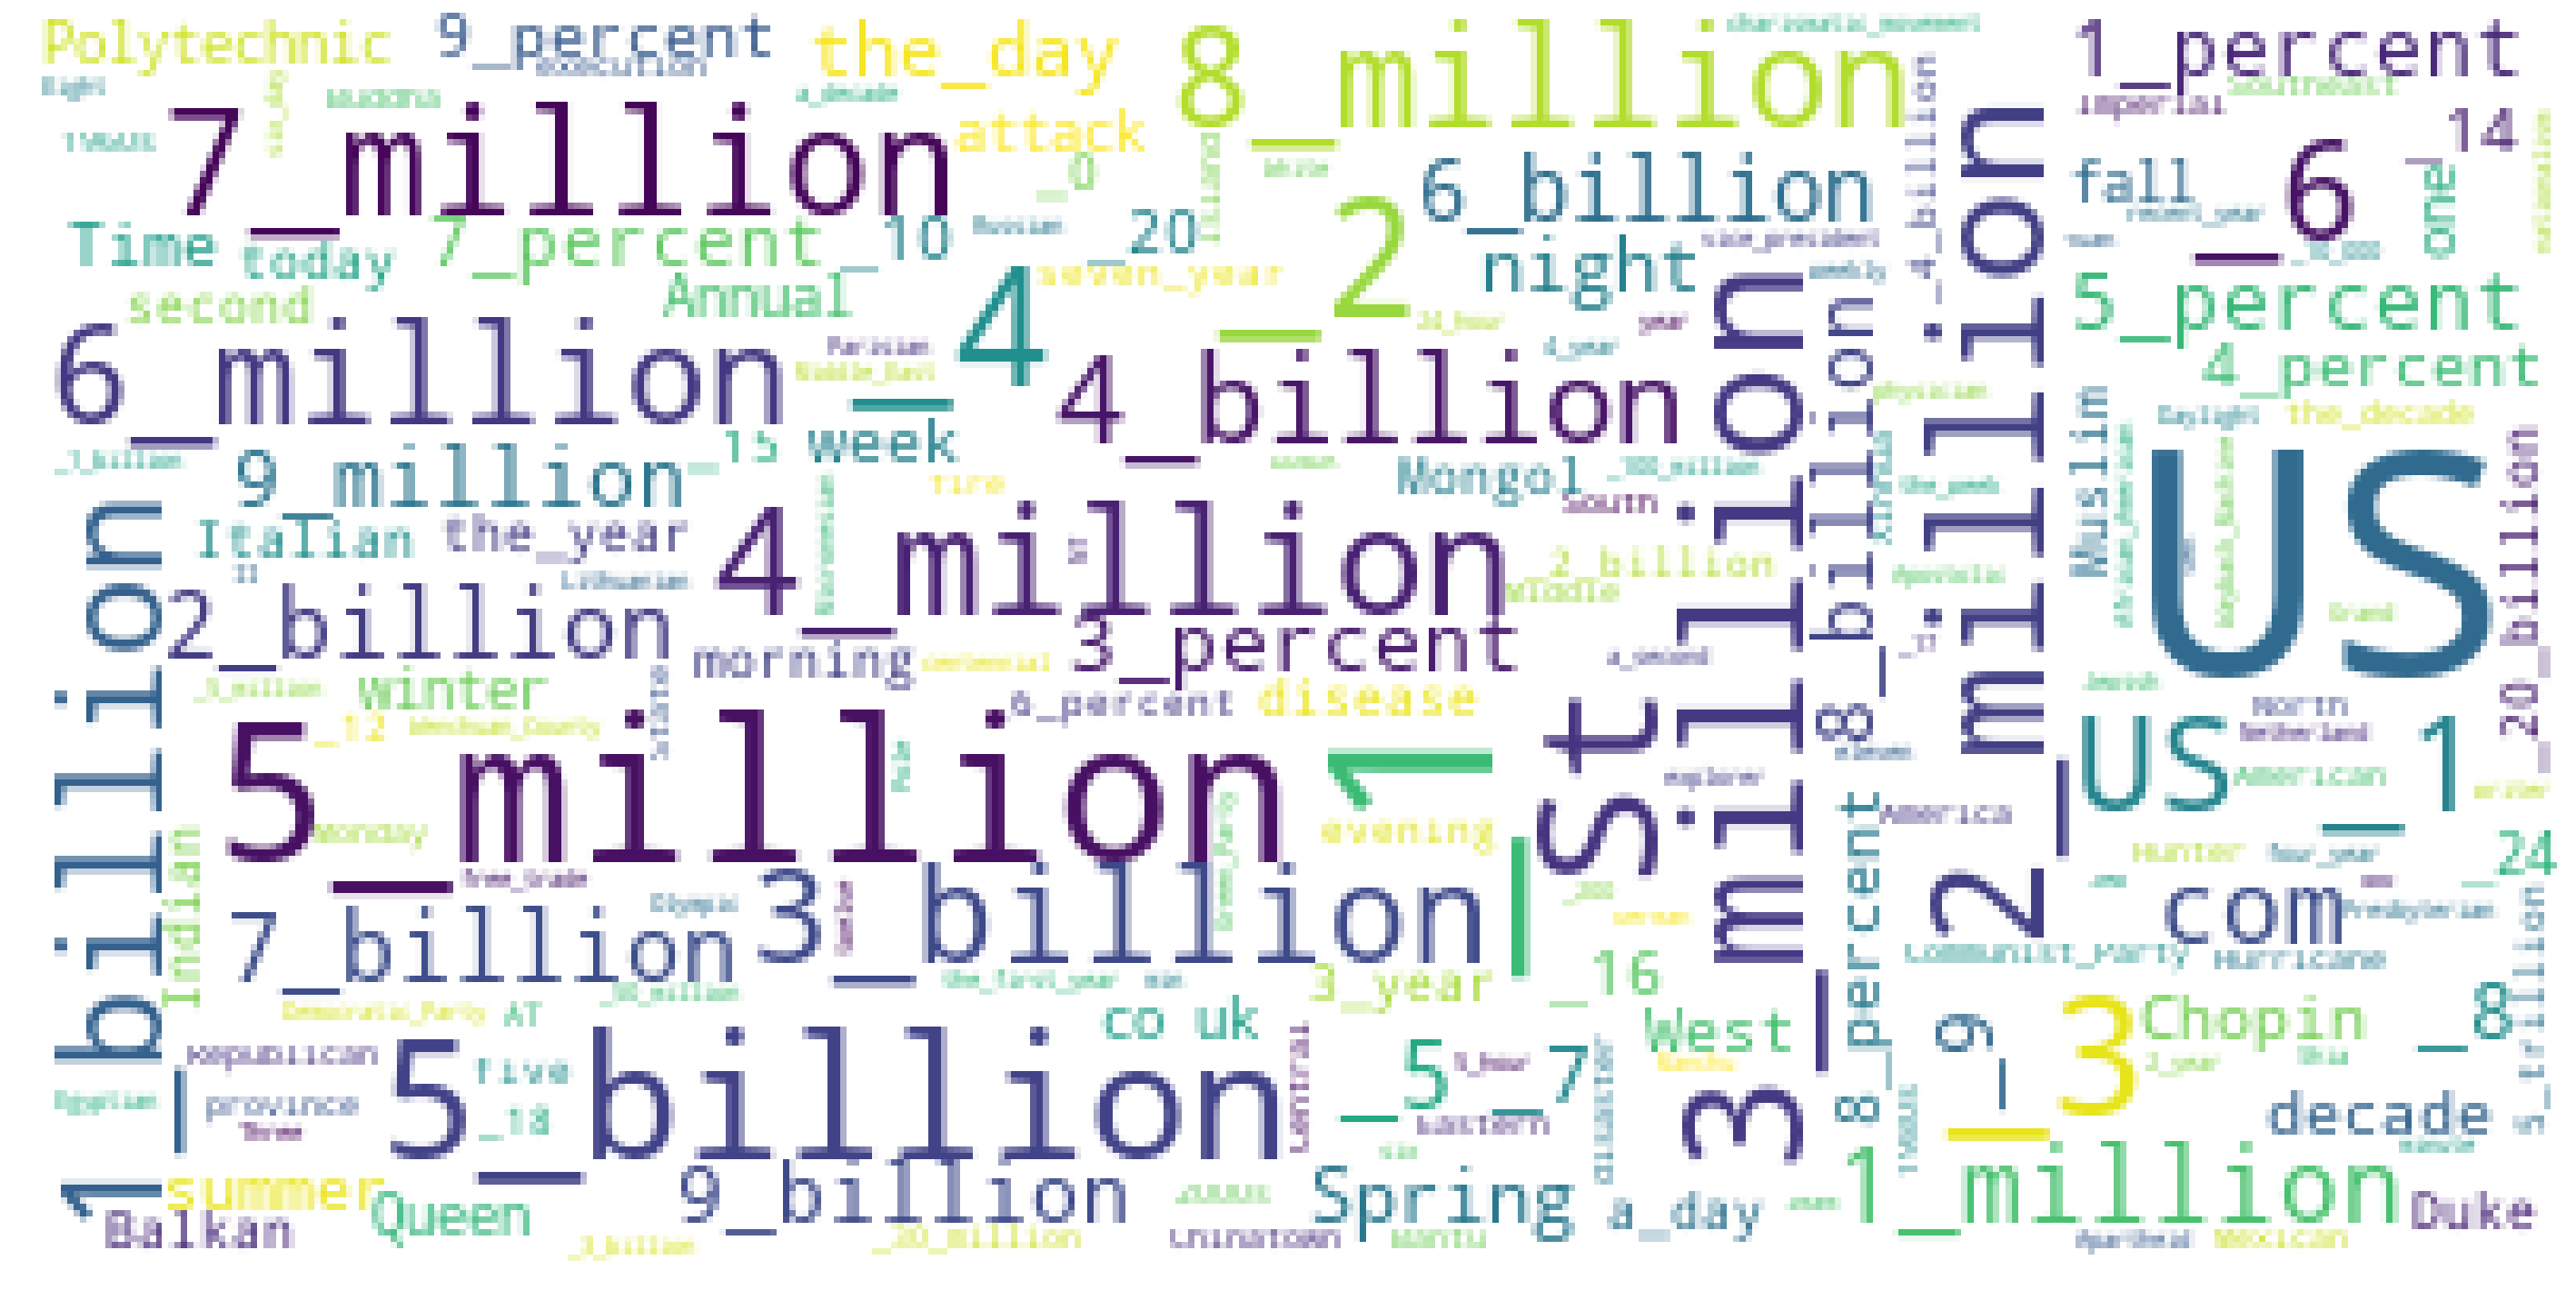

In [2009]:
generate_word_cloud(str(all_ner_values), max_words=1000, stopwords=['of', 'the', 'and', 'to','million','billion'])

In [1934]:
common_ners = ['PERSON', 'ORGANIZATION', 'COUNTRY']

In [156]:
pd.Series(count_types_ner_df['context_ner_values']['COUNTRY']).value_counts().head(10)

United States    1499
U.S.              880
France            797
China             739
India             620
England           597
Germany           562
America           551
Britain           527
US                509
dtype: int64

In [155]:
pd.Series(count_types_ner_df['query_ner_values']['COUNTRY']).value_counts().head(10)

US               561
France           326
United States    324
England          286
China            254
America          234
Britain          234
U.S.             229
UK               223
India            213
dtype: int64

### Ver ejemplos con cierta palabra

In [44]:
squad_train.loc[squad_train['answer'].str.contains('U\.S\.', na=False, case=False), ['id','query', 'answer']].values

array([['56cfe67b234ae51400d9c031', 'Who is Frank Shuman?',
        'a U.S. inventor, engineer and solar energy pioneer'],
       ['56e4ceac8c00841900fbaff9',
        "What organization's rating system promotes sustainability?",
        'The U.S. Green Building Council'],
       ['56dede26c65bf219000b3d86',
        "What governmental department contributed a grant to Schwarzenegger's hydrogen fuel project?",
        'U.S. Department of Energy'],
       ['56df76c85ca0a614008f9ac6',
        'In what country did Bell patent his telephone?', 'U.S.'],
       ['56df8d8438dc421700152034',
        'What did Bell promise to split with his financers?',
        'U.S. profits'],
       ['56df8e3e38dc421700152041',
        'What office in Washington did Bell and Gray visit?',
        'U.S. Patent Office'],
       ['56e1644ee3433e1400422e6f',
        'What legal decision resulted in movie studios letting their contract actors go?',
        'U.S. vs. Paramount Pictures, et al.'],
       ['56e7a9ce00c

In [12]:
squad_train.loc[squad_train['context'].str.contains('Beyonce', na=False, case=False), ['id','context','query', 'answer']].values

array([['56bea8463aeaaa14008c91a9',
        'In August, the couple attended the 2011 MTV Video Music Awards, at which Beyoncé performed "Love on Top" and started the performance saying "Tonight I want you to stand up on your feet, I want you to feel the love that\'s growing inside of me". At the end of the performance, she dropped her microphone, unbuttoned her blazer and rubbed her stomach, confirming her pregnancy she had alluded to earlier in the evening. Her appearance helped that year\'s MTV Video Music Awards become the most-watched broadcast in MTV history, pulling in 12.4 million viewers; the announcement was listed in Guinness World Records for "most tweets per second recorded for a single event" on Twitter, receiving 8,868 tweets per second and "Beyonce pregnant" was the most Googled term the week of August 29, 2011.',
        'Jay Z and Beyonce attended which event together in August of 2011?',
        'MTV Video Music Awards'],
       ['56bea8463aeaaa14008c91aa',
        'I

### Análisis de uni-tri-cuatri-gramas comienzo pregunta

In [70]:
unigram_freq = squad_train['query'].apply(lambda x: x.split(' ')[0].lower()).value_counts()

In [78]:
print(len(list(unigram_freq.index.values)))
unigram_freq.head(10)

3431


what     58174
who      12299
how      11421
when      7724
in        6453
which     5624
where     4617
the       3090
          2418
why       1833
Name: query, dtype: int64

In [82]:
print(sum((100*unigram_freq / len(squad_train))[11:])+1.855447)
print(sum((100*unigram_freq / len(squad_train))[:11])-1.855447)
print(sum(unigram_freq[11:])+2418)
print(sum(unigram_freq[:11])-2418)
(100*unigram_freq / len(squad_train)).head(10)

14.05857931378315
85.94142068621612
18321
111998


what     44.639692
who       9.437611
how       8.763879
when      5.926995
in        4.951695
which     4.315564
where     3.542845
the       2.371105
          1.855447
why       1.406549
Name: query, dtype: float64

In [45]:
trigrams_freq = squad_train['query'].apply(lambda x: ' '.join(x.split(' ')[0:3])).value_counts()

In [46]:
trigrams_freq.head(10)

What is the     5869
What was the    3788
In what year    2477
What type of    1949
When was the    1459
When did the    1390
What did the    1258
Who was the     1117
What kind of     896
What is a        791
Name: query, dtype: int64

In [47]:
cuatrigrams_freq = squad_train['query'].apply(lambda x: ' '.join(x.split(' ')[0:4])).value_counts()

In [56]:
cuatrigrams_freq.head(10)

In what year did        1387
What is the name        1002
In what year was         928
What was the name        843
What year did the        255
What was the first       251
What year was the        249
What is another name     211
What is the most         211
Who was the first        198
Name: query, dtype: int64

#### Longitud textos con tokenización de POS tagging

In [56]:
squad_train['len_query'] = squad_train['query_pos'].apply(lambda x: len(get_pos(x)))
squad_train['len_context'] = squad_train['context_pos'].apply(lambda x: len(get_pos(x)))
squad_train['len_answer'] = squad_train['answer_pos'].apply(lambda x: len(get_pos(x)))

In [58]:
squad_train[['len_query', 'len_context']].describe()

len_query    len_context
count  130319.000000  130319.000000
mean       10.934330     124.760242
std         3.403174      51.174610
min         1.000000      21.000000
25%         9.000000      93.000000
50%        10.000000     115.000000
75%        13.000000     147.000000
max        41.000000     701.000000

In [59]:
np.mean(squad_train.loc[squad_train['impossible']==False, 'len_answer'])

3.246081017265408

#### Common POS tagging structures in questions

In [1853]:
print(squad_train['query_pos'].values[0])
get_pos(squad_train['query_pos'].values[0])

[Tag(word='When', pos='WRB', lemma='when'), Tag(word='did', pos='VVD', lemma='do'), Tag(word='Beyonce', pos='NP', lemma='Beyonce'), Tag(word='start', pos='VV', lemma='start'), Tag(word='becoming', pos='VVG', lemma='become'), Tag(word='popular', pos='JJ', lemma='popular'), Tag(word='?', pos='SENT', lemma='?')]


['WRB', 'VVD', 'NP', 'VV', 'VVG', 'JJ', 'SENT']

In [1854]:
cuatrigrams_pos_freq = squad_train['query_pos'].apply(lambda x: ' '.join(get_pos(x)[0:4])).value_counts()
# https://courses.washington.edu/hypertxt/csar-v02/penntable.html
print(len(cuatrigrams_pos_freq.index))
cuatrigrams_pos_freq.head(10)

10389


WP VBZ DT NN    4424
WP VBD DT NN    2951
WP NN IN NN     2613
IN WP NN VVD    2445
WP VBZ DT JJ    2414
WP VBD DT JJ    1919
IN WP NN VBD    1840
WP VVD DT NN    1823
WP NN VVD NP    1722
WP NN VVD DT    1363
Name: query_pos, dtype: int64

In [89]:
trigrams_pos_freq = squad_train['query_pos'].apply(lambda x: ' '.join(get_pos(x)[0:3])).value_counts()
print(len(trigrams_pos_freq.index))
trigrams_pos_freq.head(10)

2886


WP VBZ DT     8314
WP VBD DT     5986
IN WP NN      5679
WP NN IN      5579
WP VVD DT     4858
WP NN VVD     4080
WRB JJ NNS    3883
WP VVD NP     3592
WRB VVD NP    2784
WRB VBD DT    2747
Name: query_pos, dtype: int64

In [93]:
squad_train['query_trigrams'] = squad_train['query'].apply(lambda x: ' '.join(x.split(' ')[0:3]))
squad_train['query_trigrams_pos'] = squad_train['query_pos'].apply(lambda x: ' '.join(get_pos(x)[0:3]))

In [110]:
print(squad_train.loc[(squad_train['query_trigrams_pos']=='IN DT NN') &
                (squad_train['query_trigrams']!='Wht is the'), 'query_trigrams'].unique().tolist()[0:10])

['Despite the birthdate', 'As a child', 'With the help', 'At the time', "In the film's", 'By the weekend', 'Besides the population', 'After the quake', 'After the quake,', 'In the year']


In [1860]:
pos_freq = squad_train['query_pos'].apply(lambda x: ' '.join(get_pos(x))).value_counts()
print(pos_freq.head(10))
print(100*pos_freq.head(10)/len(squad_train))

WP VVZ NP VV IN SENT          212
WP VBZ DT JJ NN IN NP SENT    154
WRB VBD DT NP NP VVD SENT     108
WP VBZ DT NN IN NP SENT       100
WP VVD IN CD SENT              98
WP VVD NP SENT                 96
WP VBD NP POS NN SENT          94
WP VBZ DT JJ NN IN NN SENT     90
WP VBZ DT NN IN NN SENT        84
WRB VBD NP NP VVD SENT         84
Name: query_pos, dtype: int64
WP VVZ NP VV IN SENT          0.162678
WP VBZ DT JJ NN IN NP SENT    0.118172
WRB VBD DT NP NP VVD SENT     0.082874
WP VBZ DT NN IN NP SENT       0.076735
WP VVD IN CD SENT             0.075200
WP VVD NP SENT                0.073665
WP VBD NP POS NN SENT         0.072131
WP VBZ DT JJ NN IN NN SENT    0.069061
WP VBZ DT NN IN NN SENT       0.064457
WRB VBD NP NP VVD SENT        0.064457
Name: query_pos, dtype: float64


In [1861]:
#squad_train['query_all_pos'] = squad_train['query_pos'].apply(lambda x: ' '.join(get_pos(x)))
#squad_train.loc[squad_train['query_all_pos'] == 'WP VVZ NP VV IN SENT', 'query']

In [1862]:
unigram_freq = squad_train['query_all_pos'].value_counts()
unigram_list = ['WP VVZ NP VV IN SENT', 'WP VBD NP POS NN SENT', 'WP VVD DT NN SENT', 'WP VBZ NP NP SENT', 'WP VBZ DT JJS NN IN DT NN SENT']
unigram_per = 0
unigram_num = 0
for element in unigram_list:
    unigram_num += unigram_freq[element]
    print(element, str(round(unigram_freq[element]/len(squad_train),4)), str(unigram_freq[element]))
print('\nOTHER')
print(len(squad_train) - unigram_num)
print((len(squad_train) - unigram_num)/len(squad_train))

WP VVZ NP VV IN SENT 0.0016 212
WP VBD NP POS NN SENT 0.0007 94
WP VVD DT NN SENT 0.0004 55
WP VBZ NP NP SENT 0.0003 40
WP VBZ DT JJS NN IN DT NN SENT 0.0002 27

OTHER
129891
0.9967157513486138


In [2681]:
squad_train.loc[squad_train['query_all_pos']=='WP VVZ NP VV IN SENT', 'query'].head()

353             What does B.I.C. stand for?
1882               What does DRM stand for?
1941               What does SDK stand for?
1980                What does HP stand for?
2222    What does Ganondorf transform into?
Name: query, dtype: object

In [126]:
pos_freq = squad_train['query_pos'].apply(lambda x: ' '.join(get_pos(x))).value_counts()
pos_freq.head(10)

In [2687]:
squad_train.loc[squad_train['query_trigrams_pos']=='WP VBZ CD', 'query'].head().values

array(['What is one way that characterizes solar technologies as passive or active?',
       'What is one of the oldest uses of solar energy?',
       'What is one of the most developed Concentrating Solar Power technologies?',
       'What is one purpose of a greenhouse?',
       'What is one of the thermochemical processes that has been explored besides electrolysis?'],
      dtype=object)

In [128]:
unigram_freq = squad_train['query_trigrams_pos'].value_counts()
unigram_list = ['WP VBZ DT', 'WDT IN DT', 'WP VBD DT', 'WP NN IN', 'WP VVD DT', 'IN WP NN', 'WP VVD NP', 'VVG TO DT', 'WRB JJ NNS', 'IN DT NN', 'PP MD VV', 'WP MD PP', 'WP NN VVD', 'WP VBD VVN', 'WP VVZ DT', 'WP VBZ NP', 'WRB VVD NP', 'WP VVZ NP', 'WRB VBD DT', 'DT NN VVZ', 'DT JJ NN', 'DT NN VBZ', 'DT NN IN']
unigram_per = 0
unigram_num = 0
for element in unigram_list:
    unigram_num += unigram_freq[element]
    print(element, str(round(unigram_freq[element]/len(squad_train),4)), str(unigram_freq[element]))
print('\nOTHER')
print(len(squad_train) - unigram_num)
print((len(squad_train) - unigram_num)/len(squad_train))

WP VBZ DT 0.0638 8314
WDT IN DT 0.0003 45
WP VBD DT 0.0459 5986
WP NN IN 0.0428 5579
WP VVD DT 0.0373 4858
IN WP NN 0.0436 5679
WP VVD NP 0.0276 3592
VVG TO DT 0.001 130
WRB JJ NNS 0.0298 3883
IN DT NN 0.004 522
PP MD VV 0.0 2
WP MD PP 0.0003 45
WP NN VVD 0.0313 4080
WP VBD VVN 0.01 1306
WP VVZ DT 0.0145 1891
WP VBZ NP 0.0062 814
WRB VVD NP 0.0214 2784
WP VVZ NP 0.0068 881
WRB VBD DT 0.0211 2747
DT NN VVZ 0.0004 58
DT JJ NN 0.0042 546
DT NN VBZ 0.0005 60
DT NN IN 0.0057 737

OTHER
75780
0.5814961747711385


In [ ]:
#all_pos = []
#for column in ['query_pos', 'answer_pos', 'context_pos']:
#    all_pos += sum(squad_train[column].apply(get_pos), [])
#all_pos = set(all_pos)

In [163]:
squad_train['answer_red_pos'] = squad_train['answer_pos'].apply(lambda x: ' '.join(get_pos(x)))

In [179]:
squad_train['answer_pral_pos'] = squad_train['answer_red_pos'].apply(lambda x: pral_pos(x))
squad_train['answer_pral_pos'].value_counts()

      50642
NP    35269
JJ    18547
NN    14517
CD     7026
V      3499
R       819
Name: answer_pral_pos, dtype: int64

In [180]:
unigram_freq = squad_train['answer_pral_pos'].value_counts()
unigram_list = ['NP','NN','JJ', 'CD','V','R']
unigram_per = 0
unigram_num = 0
for element in unigram_list:
    unigram_num += unigram_freq[element]
    print(element, str(round(unigram_freq[element]/len(squad_train),4)), str(unigram_freq[element]))
print('\nOTHER')
print(len(squad_train) - unigram_num)
print((len(squad_train) - unigram_num)/len(squad_train))

NP 0.2706 35269
NN 0.1114 14517
JJ 0.1423 18547
CD 0.0539 7026
V 0.0268 3499
R 0.0063 819

OTHER
50642
0.38860028084930054


In [176]:
squad_train.loc[squad_train['answer_pral_pos']=='R', 'answer_red_pos'].value_counts()

RB                               260
RB CD NN                          53
RB CD                             40
RB CD CD                          35
CD CD NNS RB                      35
                                ... 
IN CD NN NNS RB                    1
DT NNS CC RB NNS RB                1
RBR IN DT NN POS                   1
CD CD TO CD CD CD NNS RB           1
NN IN NN RB RB IN NN IN DT NN      1
Name: answer_red_pos, Length: 192, dtype: int64

### Obtener foco de la pregunta

Primer sustantivo de la pregunta, o en caso de partícula Wh, es automático. Where -> place, Who -> person. No tiene por qué aparecer en el texto explícito. 

WDT	wh-determiner	which;
WP	wh-pronoun	who, what;
WP$	possessive wh-pronoun	whose;
WRB	wh-abverb	where, when

In [112]:
squad_train.head(1)

title                        id  \
0  Beyoncé  56be85543aeaaa14008c9063   

                                      query             answer  impossible  \
0  When did Beyonce start becoming popular?  in the late 1990s       False   

  plausible dataset                                            context  \
0       NaN   train  Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...   

                 query_ner                                        context_ner  \
0  {'PERSON': ['Beyonce']}  {'PERSON': ['Beyoncé Giselle Knowles Carter', ...   

   ...                                          query_pos  \
0  ...  [Tag(word='When', pos='WRB', lemma='when'), Ta...   

                                          answer_pos plausible_pos  \
0  [Tag(word='in', pos='IN', lemma='in'), Tag(wor...            []   

                                         context_pos  foco len_query  \
0  [Tag(word='Beyoncé', pos='NP', lemma='Beyoncé'...  time         7   

   len_context  len_answer    query_trigrams query_trigrams_pos  
0          118           4  When did Beyonce         WRB VVD NP  

[1 rows x 21 columns]

In [737]:
print(get_word_pos(squad_train['query_pos'][0]))
print(get_pos(squad_train['query_pos'][0]))
obtener_foco(get_word_pos(squad_train['query_pos'][0]), get_pos(squad_train['query_pos'][0]))

['When', 'did', 'Beyonce', 'start', 'becoming', 'popular', '']
['WRB', 'VVD', 'NP', 'VV', 'VVG', 'JJ', 'SENT']


'time'

In [1343]:
squad_train['foco'] = squad_train.apply(lambda x: obtener_foco(get_word_pos(x['query_pos']), get_pos(x['query_pos'])), axis=1)

In [1344]:
print(len(squad_train.loc[squad_train['foco']=='', 'query'].values))
squad_train.loc[squad_train['foco']=='', 'query'].values

61


array(['What does AI stand for?', 'Why was he investigated?',
       'Which of the three was eliminated?',
       'What was higher in 2002 than in 1991?',
       'What are the seven sees?',
       'What were their 86 million of in 2008', 'Why is peering used? ',
       '[p˭ s˭] and [pʰ ʰp sʰ] are separate what?', 'What uses the ⟨◌ʱ⟩?',
       'How is writing produced?',
       'How is paperfoam commonly disposed of?',
       ' How is paperfoam uncommonly disposed of?',
       'what was broken/damaged on the boat?',
       'Is bleed easy or difficult to control?',
       'Why did some argue that "black" was the better term?',
       'How do sponges typically feed?', 'Did he understand Hebrew?', 'd',
       'Now that "Nederlands" is used for Dutch in Dutch, what do Dutch speakers call German?',
       'Some less practical', 'What was 3.28 in 2013?',
       'How are grouping determined currently?',
       'How do you say Hebrew in German?',
       'Why is it problematic that the "coloured

In [1060]:
example_query_foco = "How do you say Hebrew in German?"

In [1061]:
pos_tagging(example_query_foco)

[Tag(word='How', pos='WRB', lemma='how'),
 Tag(word='do', pos='VVP', lemma='do'),
 Tag(word='you', pos='PP', lemma='you'),
 Tag(word='say', pos='VVP', lemma='say'),
 Tag(word='Hebrew', pos='JJ', lemma='Hebrew'),
 Tag(word='in', pos='IN', lemma='in'),
 Tag(word='German', pos='JJ', lemma='German'),
 Tag(word='?', pos='SENT', lemma='?')]

In [1062]:
print(len(get_word_pos(str(pos_tagging(example_query_foco)))))
print(len(get_pos(str(pos_tagging(example_query_foco)))))
print(get_word_pos(str(pos_tagging(example_query_foco))))
print(get_pos(str(pos_tagging(example_query_foco))))
sublist(['JJ'], get_pos(str(pos_tagging(example_query_foco))))

8
8
['How', 'do', 'you', 'say', 'Hebrew', 'in', 'German', '']
['WRB', 'VVP', 'PP', 'VVP', 'JJ', 'IN', 'JJ', 'SENT']


True

In [1340]:
obtener_foco(get_word_pos(str(pos_tagging(example_query_foco))), 
             get_pos(str(pos_tagging(example_query_foco))))

''

In [1345]:
squad_train['foco'].value_counts().head(10)

person        12777
number        10261
time           8229
place          4823
year           4351
name           2727
type           2377
percentage      968
kind            967
country         917
Name: foco, dtype: int64

In [1346]:
#squad_train['foco'].value_counts().head(10) / len(squad_train)

#squad_train_focos[squad_train_focos > 50]

In [1347]:
unigram_freq = squad_train['foco'].value_counts()
unigram_list = ['person','number', 'time','place','year','name','type', 'people', 'country', 'percentage', 'kind', 'age'] 
unigram_per = 0
unigram_num = 0
for element in unigram_list:
    unigram_num += unigram_freq[element]
    print(element, str(round(unigram_freq[element]/len(squad_train),4)), str(unigram_freq[element]))
print('\nOTHER')
print(len(squad_train) - unigram_num)
print((len(squad_train) - unigram_num)/len(squad_train))

person 0.098 12777
number 0.0787 10261
time 0.0631 8229
place 0.037 4823
year 0.0334 4351
name 0.0209 2727
type 0.0182 2377
people 0.0031 401
country 0.007 917
percentage 0.0074 968
kind 0.0074 967
age 0.0014 177

OTHER
81344
0.6241914072391593


In [1214]:
#fig = px.histogram(squad_train, x="foco").update_xaxes(categoryorder="total descending")
#fig.show()

In [1215]:
squad_train.head(1)

title                        id  \
0  Beyoncé  56be85543aeaaa14008c9063   

                                      query             answer  impossible  \
0  When did Beyonce start becoming popular?  in the late 1990s       False   

  plausible dataset                                            context  \
0       NaN   train  Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...   

                 query_ner                                        context_ner  \
0  {'PERSON': ['Beyonce']}  {'PERSON': ['Beyoncé Giselle Knowles Carter', ...   

   ... len_query len_context len_answer  foco  \
0  ...         7         133          4  time   

             phiyodr/bert-base-finetuned-squad2_json    query_trigrams  \
0  {'score': 0.5366495251655579, 'start': 281, 'e...  When did Beyonce   

  query_trigrams_pos foco_norm answer_ner_tags validation_foco_ner  
0         WRB VVD NP      time        ['DATE']                  OK  

[1 rows x 34 columns]

In [1216]:
squad_train.columns

Index(['title', 'id', 'query', 'answer', 'impossible', 'plausible', 'dataset',
       'context', 'query_ner', 'context_ner', 'answer_ner', 'query_pos',
       'answer_pos', 'plausible_pos', 'context_pos',
       'phiyodr/roberta-large-finetuned-squad2', 'deepset/roberta-base-squad2',
       'phiyodr/bert-large-finetuned-squad2',
       'phiyodr/bert-base-finetuned-squad2', 'valhalla/t5-base-squad',
       'query_cuatrigrams', 'query_cuatrigrams_pos', 'answer_red_pos',
       'answer_pral_pos', 'len_query', 'len_context', 'len_answer', 'foco',
       'phiyodr/bert-base-finetuned-squad2_json', 'query_trigrams',
       'query_trigrams_pos', 'foco_norm', 'answer_ner_tags',
       'validation_foco_ner'],
      dtype='object')

In [1352]:
print(len(list(squad_train['foco'].value_counts().index)))
print(list(squad_train['foco'].value_counts().index))

14964
['person', 'number', 'time', 'place', 'year', 'name', 'type', 'percentage', 'kind', 'country', 'term', 'group', 'city', 'language', 'date', 'century', 'part', 'people', 'company', 'area', 'state', 'word', 'countries', 'example', 'types', 'event', 'Whose', 'years', 'period', 'organization', 'population', 'color', 'month', 'system', 'government', 'party', 'percent', 'form', 'groups', 'religion', 'book', 'decade', 'law', 'war', 'school', 'day', 'region', 'age', 'New', 'title', 'style', 'purpose', 'areas', 'languages', 'way', 'US', 'use', 'reason', 'process', 'team', 'Whitehead', 'addition', 'era', 'method', 'amount', 'season', 'examples', 'university', 'sort', 'position', 'John', 'body', 'study', 'species', 'film', 'result', 'temperature', 'theory', 'states', 'river', 'church', 'names', 'effect', 'cities', 'direction', 'movement', 'song', 'nationality', 'United', 'Queen', 'building', 'feature', 'work', 'things', 'parts', 'terms', 'role', 'goal', 'act', 'Beyonce', 'Chopin', 'nation',

In [1320]:
fig = px.histogram(squad_train, x="foco").update_xaxes(categoryorder="total descending")
fig.show()

##### Validacion tipo foco y entidad respuesta

In [2060]:
squad_train['answer_ner_tags_processed'] = squad_train['answer_ner_tags'].apply(lambda x: len([x for x in str(x).replace('"','').replace("'",'').split(', ') if x and x!='[]']))

In [2061]:
def marca_multiple_ninguna_ner(tipo_ner, number_ner, impossible):
    if impossible:
        return 'NO RESP'
    if number_ner == 0:
        return 'SIN NER'
    if number_ner == 1:
        return str(tipo_ner).replace('[','').replace(']','').replace("'",'')
    else:
        return 'MULTI'

In [2062]:
squad_train['answer_ner_tags_processed'] = squad_train[['answer_ner_tags', 'answer_ner_tags_processed', 'impossible']].apply(lambda x: marca_multiple_ninguna_ner(x[0], x[1], x[2]), axis=1)

In [2063]:
print(squad_train['answer_ner_tags_processed'].value_counts())
print(100*squad_train['answer_ner_tags_processed'].value_counts() / len(squad_train))

NO RESP              43498
SIN NER              32759
PERSON               11192
NUMBER                9255
DATE                  9192
MULTI                 6901
ORGANIZATION          3291
COUNTRY               1946
NATIONALITY           1639
CITY                  1531
LOCATION              1364
MISC                  1323
TITLE                 1240
RELIGION               800
DURATION               798
ORDINAL                769
MONEY                  712
CAUSE_OF_DEATH         532
IDEOLOGY               441
STATE_OR_PROVINCE      410
SET                    329
CRIMINAL_CHARGE        168
PERCENT                131
TIME                    78
URL                     20
Name: answer_ner_tags_processed, dtype: int64
NO RESP              33.378095
SIN NER              25.137547
PERSON                8.588157
NUMBER                7.101804
DATE                  7.053461
MULTI                 5.295467
ORGANIZATION          2.525342
COUNTRY               1.493259
NATIONALITY           1.257683


In [2065]:
def get_ner_count(ner_dict, specific_ner):
    if ner_dict and specific_ner in ner_dict.keys():
        return len(ner_dict[specific_ner])
    return 0

def entidades_posibles_contexto(tipo_ner, context_ner):
    return get_ner_count(load_data(context_ner), tipo_ner)

In [2066]:
squad_train['context_ner_tags_answer'] = squad_train[['answer_ner_tags_processed', 'context_ner']].apply(lambda x: entidades_posibles_contexto(x[0], x[1]), axis=1)

In [2069]:
squad_train[['answer_ner_tags_processed', 'context_ner_tags_answer']].groupby(['answer_ner_tags_processed']).mean()

context_ner_tags_answer
answer_ner_tags_processed                         
CAUSE_OF_DEATH                            2.958647
CITY                                      3.216199
COUNTRY                                   4.195272
CRIMINAL_CHARGE                           2.482143
DATE                                      3.895561
DURATION                                  1.843358
IDEOLOGY                                  2.201814
LOCATION                                  3.901026
MISC                                      3.466364
MONEY                                     2.625000
MULTI                                     0.000000
NATIONALITY                               3.830995
NO RESP                                   0.000000
NUMBER                                    5.188871
ORDINAL                                   1.789337
ORGANIZATION                              4.155576
PERCENT                                   2.587786
PERSON                                    4.215600
RELIGION                                  3.591250
SET                                       0.623100
SIN NER                                   0.000000
STATE_OR_PROVINCE                         2.958537
TIME                                      2.230769
TITLE                                     3.063710
URL                                       1.350000

In [1348]:
print(sum(squad_train.loc[squad_train['foco'] == 'person', 'answer_ner_tags'].value_counts()))
squad_train.loc[squad_train['foco'] == 'person', 'answer_ner_tags'].value_counts()

12777


[]                                                       5773
['PERSON']                                               4561
['ORGANIZATION']                                          473
['TITLE', 'PERSON']                                       390
['TITLE']                                                 230
                                                         ... 
['RELIGION', 'TITLE', 'CITY']                               1
['LOCATION', 'PERSON', 'NATIONALITY']                       1
['NUMBER', 'LOCATION']                                      1
['IDEOLOGY', 'COUNTRY', 'CITY', 'LOCATION', 'PERSON']       1
['ORGANIZATION', 'RELIGION']                                1
Name: answer_ner_tags, Length: 210, dtype: int64

In [1349]:
print(sum(squad_train.loc[squad_train['foco'] == 'place', 'answer_ner_tags'].value_counts()))
squad_train.loc[squad_train['foco'] == 'place', 'answer_ner_tags'].value_counts()

4823


[]                                           2370
['CITY']                                      414
['PERSON']                                    387
['COUNTRY']                                   284
['LOCATION']                                  274
                                             ... 
['CITY', 'MISC', 'NATIONALITY']                 1
['ORDINAL', 'CITY', 'LOCATION', 'DATE']         1
['PERSON', 'DATE', 'LOCATION', 'COUNTRY']       1
['ORDINAL', 'TITLE']                            1
['PERSON', 'COUNTRY', 'LOCATION']               1
Name: answer_ner_tags, Length: 189, dtype: int64

In [1425]:
pos_tagging('five')

[Tag(word='time', pos='NN', lemma='time')]

In [1426]:
print(validate_foco_ner('time', ['PERSON'], 'NaN')) #['DATE', 'TIME', 'DURATION'])
print(validate_foco_ner('', ['PERSON'], 'my cousin'))
print(validate_foco_ner('people', [], 'my cousin'))
print(validate_foco_ner('five', ['NUMBER'], '...'))

NA
NA
NA
OK-NUMBER


In [1427]:
print(squad_train['foco'].values[0])
print(squad_train['answer_ner_tags'].values[0])
validate_foco_ner(squad_train['foco'].values[0], squad_train['answer_ner_tags'].values[0], squad_train['answer'].values[0])

time
['DATE']


'OK-TIME'

In [1428]:
squad_train['answer'] = squad_train['answer'].fillna('')
squad_train['validation_foco_ner'] = squad_train[['foco', 'answer_ner_tags', 'answer']].apply(lambda x: validate_foco_ner(x.foco, x.answer_ner_tags, x.answer), axis=1)

In [1429]:
squad_train.loc[squad_train['answer_ner_tags'].isna(), 'validation_foco_ner'] = 'NA'
squad_train.loc[squad_train['answer_ner_tags']=='[]', 'validation_foco_ner'] = 'NA'

In [1435]:
squad_train['validation_foco_ner'].value_counts().index

Index(['NA', 'KO', 'OK-TIME', 'OK-NUMBER', 'OK-PERSON', 'OK-PERSON-ORG',
       'OK-LOC', 'OK-COUNTRY', 'OK-DATE', 'OK-CITY', 'OK-TITLE',
       'OK-ORGANIZATION', 'OK-RELIGION', 'OK-NATIONALITY', 'OK-LOCATION',
       'OK-PERCENT', 'OK-IDEOLOGY', 'OK-URL', 'OK-DURATION', 'OK-MONEY'],
      dtype='object')

In [1442]:
unigram_list = ['OK-PERSON', 'OK-ORGANIZATION', 'OK-PERSON-ORG',
                'OK-TITLE', 'OK-NATIONALITY', 'OK-RELIGION', 'OK-IDEOLOGY',
                'OK-LOC','OK-COUNTRY','OK-LOCATION', 'OK-CITY',
                'OK-DATE', 'OK-TIME', 'OK-DURATION',
                'OK-NUMBER','OK-PERCENT','OK-MONEY', 'OK-URL', #'OK-MISC',
                'KO', 'NA']

unigram_freq = squad_train['validation_foco_ner'].value_counts()
unigram_per = 0
unigram_num = 0
for element in unigram_list:
    unigram_num += unigram_freq[element]
    print(element, str(round(unigram_freq[element]/len(squad_train),4)), str(unigram_freq[element]))
print('\nOTHER')
print(len(squad_train) - unigram_num)
print((len(squad_train) - unigram_num)/len(squad_train))

OK-PERSON 0.0397 5175
OK-ORGANIZATION 0.0008 107
OK-PERSON-ORG 0.0254 3309
OK-TITLE 0.0014 181
OK-NATIONALITY 0.0005 62
OK-RELIGION 0.0008 107
OK-IDEOLOGY 0.0001 11
OK-LOC 0.0179 2328
OK-COUNTRY 0.0036 469
OK-LOCATION 0.0001 17
OK-CITY 0.0024 309
OK-DATE 0.003 389
OK-TIME 0.0614 8004
OK-DURATION 0.0 2
OK-NUMBER 0.0558 7272
OK-PERCENT 0.0001 13
OK-MONEY 0.0 1
OK-URL 0.0 2
KO 0.2017 26283
NA 0.5853 76278

OTHER
0
0.0


In [1432]:
#squad_train.loc[(squad_train['validation_foco_ner']=='KO') 
#                & (squad_train['answer_ner_tags']=='[\'NUMBER\']'),
#                ['query', 'foco', 'answer', 'answer_ner_tags']]

squad_train.loc[(squad_train['validation_foco_ner']=='KO'), ['query', 'foco', 'answer', 'answer_ner_tags'] ]
#squad_train.loc[squad_train['answer_ner_tags']=='[]', ['query', 'foco', 'answer', 'answer_ner_tags']]

query       foco  \
13            What was Beyoncé's role in Destiny's Child?    Beyoncé   
16                        Which artist did Beyonce marry?     artist   
20      Which album was darker in tone from her previo...      album   
21      After what movie portraying Etta James, did Be...      movie   
29      Which magazine declared her the most dominant ...   magazine   
...                                                   ...        ...   
130034  In what part of Kathmandu is Dasarath Rangasal...       part   
130040  If one wished to travel north out of Kathmandu...  Kathmandu   
130046  In what US state did Kathmandu first establish...         US   
130047               What was Yangon previously known as?     Yangon   
130050                      What is KMC an initialism of?        KMC   

                             answer        answer_ner_tags  
13                      lead singer              ['TITLE']  
16                            Jay Z             ['PERSON']  
20                          Beyoncé             ['PERSON']  
21                 Cadillac Records       ['ORGANIZATION']  
29                           Forbes             ['PERSON']  
...                             ...                    ...  
130034                 Tripureshwor             ['PERSON']  
130040                      Araniko             ['PERSON']  
130046                       Oregon  ['STATE_OR_PROVINCE']  
130047                      Rangoon               ['CITY']  
130050  Kathmandu Metropolitan City           ['LOCATION']  

[26283 rows x 4 columns]

In [1433]:
squad_train.columns

Index(['title', 'id', 'query', 'answer', 'impossible', 'plausible', 'dataset',
       'context', 'query_ner', 'context_ner', 'answer_ner', 'query_pos',
       'answer_pos', 'plausible_pos', 'context_pos',
       'phiyodr/roberta-large-finetuned-squad2', 'deepset/roberta-base-squad2',
       'phiyodr/bert-large-finetuned-squad2',
       'phiyodr/bert-base-finetuned-squad2', 'valhalla/t5-base-squad',
       'query_cuatrigrams', 'query_cuatrigrams_pos', 'answer_red_pos',
       'answer_pral_pos', 'len_query', 'len_context', 'len_answer', 'foco',
       'phiyodr/bert-base-finetuned-squad2_json', 'query_trigrams',
       'query_trigrams_pos', 'foco_norm', 'answer_ner_tags',
       'validation_foco_ner'],
      dtype='object')

In [2070]:
#squad_train.to_excel('datasets/squad/models/NER-POS-F-SQUAD-train-queries.xlsx', index=False)

In [2764]:
#squad_train.to_excel('NER-POS-F-SQUAD-train-queries.xlsx', index=False)
squad_train.to_excel('datasets/squad/models/BERT-NER-POS-F-SQUAD-train-queries.xlsx', index=False)

In [7]:
#squad_train = pd.read_excel('NER-POS-F-SQUAD-train-queries.xlsx')

### Results of models

In [5]:
squad_train = pd.read_excel('BERT-NER-POS-F-SQUAD-ftunSQUAD-train-queries.xlsx')

In [1816]:
squad_train['query_unigrams'] = squad_train['query'].apply(lambda x: x.split(' ')[0].lower())
squad_train['query_unigrams_pos'] = squad_train['query_pos'].apply(lambda x: get_pos(x)[0])
squad_train['query_trigrams'] = squad_train['query'].apply(lambda x: ' '.join(x.split(' ')[0:3]))
squad_train['query_trigrams_pos'] = squad_train['query_pos'].apply(lambda x: ' '.join(get_pos(x)[0:3]))
squad_train['query_cuatrigrams'] = squad_train['query'].apply(lambda x: ' '.join(x.split(' ')[0:4]))
squad_train['query_cuatrigrams_pos'] = squad_train['query_pos'].apply(lambda x: ' '.join(get_pos(x)[0:4]))

squad_train['answer_red_pos'] = squad_train['answer_pos'].apply(lambda x: ' '.join(get_pos(x)))
squad_train['answer_pral_pos'] = squad_train['answer_red_pos'].apply(lambda x: pral_pos(x))
squad_train['answer_ner_tags'] = squad_train['answer_ner'].apply(lambda x: str(get_ner_tags(load_data(x))))

squad_train['len_query'] = squad_train['query_pos'].apply(lambda x: len(get_pos(x)))
squad_train['len_context'] = squad_train['context_pos'].apply(lambda x: len(get_pos(x)))
squad_train['len_answer'] = squad_train['answer_pos'].apply(lambda x: len(get_pos(x)))

squad_train['foco'] = squad_train.apply(lambda x: obtener_foco(get_word_pos(x['query_pos']), get_pos(x['query_pos'])), axis=1)
squad_train['foco_norm'] = squad_train['foco'].apply(lambda x: transform_foco(x))

In [2072]:
squad_train.columns

Index(['title', 'id', 'query', 'answer', 'impossible', 'plausible', 'dataset',
       'context', 'query_ner', 'context_ner', 'answer_ner', 'query_pos',
       'answer_pos', 'plausible_pos', 'context_pos',
       'phiyodr/roberta-large-finetuned-squad2', 'deepset/roberta-base-squad2',
       'phiyodr/bert-large-finetuned-squad2',
       'phiyodr/bert-base-finetuned-squad2', 'valhalla/t5-base-squad',
       'query_cuatrigrams', 'query_cuatrigrams_pos', 'answer_red_pos',
       'answer_pral_pos', 'len_query', 'len_context', 'len_answer', 'foco',
       'phiyodr/bert-base-finetuned-squad2_json', 'query_trigrams',
       'query_trigrams_pos', 'foco_norm', 'answer_ner_tags',
       'validation_foco_ner', 'phiyodr/bert-large-finetuned-squad2_json',
       'deepset/roberta-base-squad2_json',
       'phiyodr/roberta-large-finetuned-squad2_json',
       'valhalla/t5-base-squad_json', 'query_unigrams', 'query_unigrams_pos',
       'query_all_pos', 'answer_ner_tags_processed',
       'context_ner_

In [1543]:
MODELS = [
            'phiyodr/bert-base-finetuned-squad2', 'phiyodr/bert-large-finetuned-squad2',
            'deepset/roberta-base-squad2', 'phiyodr/roberta-large-finetuned-squad2',
            'valhalla/t5-base-squad'
        ]

In [2167]:
new_df = squad_train[['id', 'query', 'answer', 'impossible', 'plausible', 'dataset', 'context',
                    'query_ner','answer_ner','answer_ner_tags','query_pos','answer_pos','foco', 'foco_norm',
                      'query_unigrams', 'query_unigrams_pos',
                    'query_trigrams_pos', 'query_trigrams', 'query_cuatrigrams_pos', 'query_cuatrigrams',
                    'answer_red_pos', 'answer_pral_pos', 'validation_foco_ner', 'len_query', 'len_context', 'len_answer',
                      'context_ner']+MODELS].copy()

In [2168]:
new_df = new_df.loc[new_df['impossible'] == False].copy()

In [2207]:
model = MODELS[4]
model

'valhalla/t5-base-squad'

In [2199]:
new_df[model+'_json'] = new_df[model].apply(lambda x: load_answer_data(str(x)))

Invalid \escape: line 1 column 101 (char 100)
{"score": 0.04153254255652428, "start": 361, "end": 417, "answer": "capture information such as what\, when and where."}
'NoneType' object has no attribute 'group'
nan
'NoneType' object has no attribute 'group'
nan
'NoneType' object has no attribute 'group'
nan
'NoneType' object has no attribute 'group'
nan


In [2200]:
sum(new_df[model+'_json'].isna())

0

In [2201]:
new_df.columns

Index(['id', 'query', 'answer', 'impossible', 'plausible', 'dataset',
       'context', 'query_ner', 'answer_ner', 'answer_ner_tags', 'query_pos',
       'answer_pos', 'foco', 'foco_norm', 'query_unigrams',
       'query_unigrams_pos', 'query_trigrams_pos', 'query_trigrams',
       'query_cuatrigrams_pos', 'query_cuatrigrams', 'answer_red_pos',
       'answer_pral_pos', 'validation_foco_ner', 'len_query', 'len_context',
       'len_answer', 'context_ner', 'phiyodr/bert-base-finetuned-squad2',
       'phiyodr/bert-large-finetuned-squad2', 'deepset/roberta-base-squad2',
       'phiyodr/roberta-large-finetuned-squad2', 'valhalla/t5-base-squad',
       'phiyodr/bert-base-finetuned-squad2_json',
       'score_phiyodr/bert-base-finetuned-squad2',
       'answer_model_phiyodr/bert-base-finetuned-squad2',
       'correct_phiyodr/bert-base-finetuned-squad2',
       'phiyodr/bert-large-finetuned-squad2_json',
       'score_phiyodr/bert-large-finetuned-squad2',
       'answer_model_phiyodr/bert-l

In [2211]:
#new_df['score_'+model] = new_df[model+'_json'].apply(lambda x: round(float(x['score']),5) if 'score' in x.keys() else 0.0)
#new_df['answer_model_'+model] = new_df[model+'_json'].apply(lambda x: x['answer'] if 'answer' in x.keys() else '')
# T5
new_df['answer_model_'+model] = new_df[model].apply(lambda x: x)

In [2212]:
#sum(new_df['score'].isna())

In [2213]:
new_df['correct_'+model] = new_df[['answer', 'answer_model_'+model, 'plausible']].apply(lambda x: 
                                            correct(x['answer'], x['answer_model_'+model], x['plausible']), axis=1)

In [2214]:
new_df['correct_'+model].value_counts()

True     82839
False     3982
Name: correct_valhalla/t5-base-squad, dtype: int64

In [2215]:
new_df.columns

Index(['id', 'query', 'answer', 'impossible', 'plausible', 'dataset',
       'context', 'query_ner', 'answer_ner', 'answer_ner_tags', 'query_pos',
       'answer_pos', 'foco', 'foco_norm', 'query_unigrams',
       'query_unigrams_pos', 'query_trigrams_pos', 'query_trigrams',
       'query_cuatrigrams_pos', 'query_cuatrigrams', 'answer_red_pos',
       'answer_pral_pos', 'validation_foco_ner', 'len_query', 'len_context',
       'len_answer', 'context_ner', 'phiyodr/bert-base-finetuned-squad2',
       'phiyodr/bert-large-finetuned-squad2', 'deepset/roberta-base-squad2',
       'phiyodr/roberta-large-finetuned-squad2', 'valhalla/t5-base-squad',
       'phiyodr/bert-base-finetuned-squad2_json',
       'score_phiyodr/bert-base-finetuned-squad2',
       'answer_model_phiyodr/bert-base-finetuned-squad2',
       'correct_phiyodr/bert-base-finetuned-squad2',
       'phiyodr/bert-large-finetuned-squad2_json',
       'score_phiyodr/bert-large-finetuned-squad2',
       'answer_model_phiyodr/bert-l

In [2383]:
print(new_df.loc[new_df['impossible']==False, 'correct_'+MODELS[4]].value_counts())
print(100*new_df.loc[new_df['impossible']==False, 'correct_'+MODELS[4]].value_counts() / len(new_df.loc[new_df['impossible']==False]))

True     82839
False     3982
Name: correct_valhalla/t5-base-squad, dtype: int64
True     95.413552
False     4.586448
Name: correct_valhalla/t5-base-squad, dtype: float64


In [2216]:
#new_df.to_excel('datasets/squad/models/ERRnotimpossible-BERT-NER-POS-F-SQUAD-train-queries.xlsx')

In [2315]:
#new_df = pd.read_excel('datasets/squad/models/ERRnotimpossible-BERT-NER-POS-F-SQUAD-train-queries.xlsx')

In [2427]:
new_df['error_by'] = ''
new_df['correct_by'] = ''

In [2428]:
new_df.loc[(new_df['correct_phiyodr/bert-base-finetuned-squad2'] == False) |
            (new_df['correct_phiyodr/bert-large-finetuned-squad2'] == False), 'error_by' ] = 'BERT'
new_df.loc[(new_df['correct_phiyodr/bert-base-finetuned-squad2'] == True) &
            (new_df['correct_phiyodr/bert-large-finetuned-squad2'] == True), 'correct_by' ] = 'BERT'

In [2429]:
new_df.loc[(new_df['correct_deepset/roberta-base-squad2'] == False) |
            (new_df['correct_phiyodr/roberta-large-finetuned-squad2'] == False), 'error_by' ] += ', RoBERTa'
new_df.loc[(new_df['correct_deepset/roberta-base-squad2'] == True) &
            (new_df['correct_phiyodr/roberta-large-finetuned-squad2'] == True), 'correct_by' ] += ', RoBERTa'

In [2430]:
new_df.loc[(new_df['correct_valhalla/t5-base-squad'] == False), 'error_by' ] += ', T5'
new_df.loc[(new_df['correct_valhalla/t5-base-squad'] == True), 'correct_by' ] += ', T5'

In [2431]:
new_df.loc[new_df['error_by'] == ', RoBERTa', 'error_by'] = 'RoBERTa'
new_df.loc[new_df['error_by'] == ', T5', 'error_by'] = 'T5'
new_df.loc[new_df['error_by'] == ', RoBERTa, T5', 'error_by'] = 'RoBERTa, T5'
new_df.loc[new_df['correct_by'] == ', RoBERTa', 'correct_by'] = 'RoBERTa'
new_df.loc[new_df['correct_by'] == ', T5', 'correct_by'] = 'T5'
new_df.loc[new_df['correct_by'] == ', RoBERTa, T5', 'correct_by'] = 'RoBERTa, T5'

In [2432]:
new_df['error_by'].value_counts()

                     77135
RoBERTa               3617
T5                    1685
BERT, RoBERTa, T5     1180
BERT, RoBERTa         1116
BERT                   971
RoBERTa, T5            903
BERT, T5               214
Name: error_by, dtype: int64

In [2433]:
new_df['correct_by'].value_counts()

BERT, RoBERTa, T5    77135
BERT, T5              3617
BERT, RoBERTa         1685
                      1180
T5                    1116
RoBERTa, T5            971
BERT                   903
RoBERTa                214
Name: correct_by, dtype: int64

In [2434]:
new_df.loc[new_df['error_by'] != '', 'correct'] = False

In [2435]:
new_df['models_answers'] = new_df['error_by']

In [2436]:
error_models = new_df.loc[new_df['error_by'] != '', ['id', 'models_answers', 'correct']].copy()

In [2437]:
new_df['models_answers'] = new_df['correct_by']
new_df['correct'] = True
#new_df.loc[new_df['models_answers'] == '', 'correct'] = False
#new_df.loc[new_df['models_answers'] == '', 'models_answers'] = 'BERT, RoBERTa, T5'

In [2438]:
error_models = pd.concat([error_models, new_df.loc[new_df['models_answers'] != '', ['id', 'models_answers', 'correct']]])

In [2439]:
error_models.groupby(['correct','models_answers']).count()

id
correct models_answers          
False   BERT                 971
        BERT, RoBERTa       1116
        BERT, RoBERTa, T5   1180
        BERT, T5             214
        RoBERTa             3617
        RoBERTa, T5          903
        T5                  1685
True    BERT                 903
        BERT, RoBERTa       1685
        BERT, RoBERTa, T5  77135
        BERT, T5            3617
        RoBERTa              214
        RoBERTa, T5          971
        T5                  1116

In [2444]:
print(len(squad_train.loc[squad_train['impossible']==False]))
print(error_models.loc[error_models['correct']==False, ['id','correct']].groupby(['correct']).count())
#print(error_models.loc[error_models['correct']==True, ['id','correct']].groupby(['correct']).count())

86821
           id
correct      
False    9686


In [2445]:
100*error_models.groupby(['correct','models_answers']).count() / len(squad_train.loc[squad_train['impossible']==False])

id
correct models_answers              
False   BERT                1.118393
        BERT, RoBERTa       1.285403
        BERT, RoBERTa, T5   1.359118
        BERT, T5            0.246484
        RoBERTa             4.166043
        RoBERTa, T5         1.040071
        T5                  1.940775
True    BERT                1.040071
        BERT, RoBERTa       1.940775
        BERT, RoBERTa, T5  88.843713
        BERT, T5            4.166043
        RoBERTa             0.246484
        RoBERTa, T5         1.118393
        T5                  1.285403

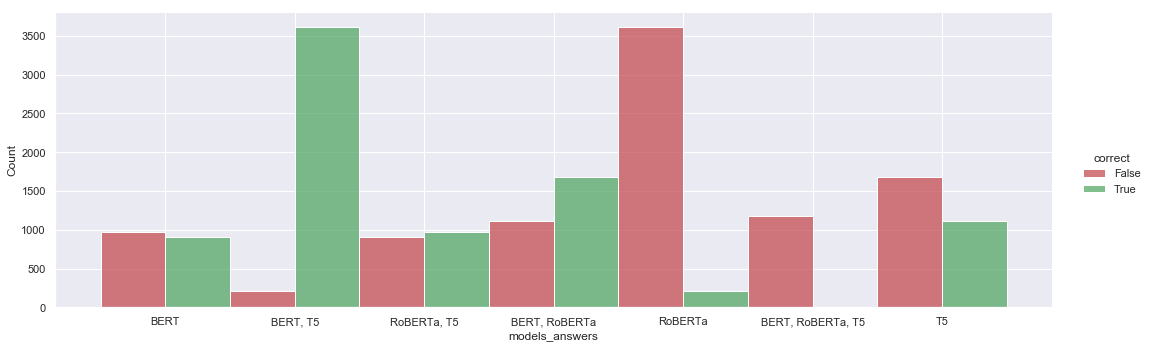

In [2446]:
sns.displot(error_models.loc[~((error_models['correct']==True)&(error_models['models_answers']=='BERT, RoBERTa, T5'))], 
            aspect=25/8.27, x="models_answers", hue="correct",
            kind="hist", multiple="dodge", palette=['r','g'], hue_order=[False, True])

In [2368]:
error_models.to_excel('datasets/squad/models/ERR-COMMON-notimpossible-BERT-NER-POS-F-SQUAD-train-queries.xlsx')

In [2552]:
new_df.columns

Index(['Unnamed: 0', 'id', 'query', 'answer', 'impossible', 'plausible',
       'dataset', 'context', 'query_ner', 'answer_ner', 'answer_ner_tags',
       'query_pos', 'answer_pos', 'foco', 'foco_norm', 'query_unigrams',
       'query_unigrams_pos', 'query_trigrams_pos', 'query_trigrams',
       'query_cuatrigrams_pos', 'query_cuatrigrams', 'answer_red_pos',
       'answer_pral_pos', 'validation_foco_ner', 'len_query', 'len_context',
       'len_answer', 'context_ner', 'phiyodr/bert-base-finetuned-squad2',
       'phiyodr/bert-large-finetuned-squad2', 'deepset/roberta-base-squad2',
       'phiyodr/roberta-large-finetuned-squad2', 'valhalla/t5-base-squad',
       'phiyodr/bert-base-finetuned-squad2_json',
       'score_phiyodr/bert-base-finetuned-squad2',
       'answer_model_phiyodr/bert-base-finetuned-squad2',
       'correct_phiyodr/bert-base-finetuned-squad2',
       'phiyodr/bert-large-finetuned-squad2_json',
       'score_phiyodr/bert-large-finetuned-squad2',
       'answer_model_

In [2629]:
new_df.loc[new_df['correct_phiyodr/bert-base-finetuned-squad2']==False, 
           'tag_correct_phiyodr/bert-base-finetuned-squad2'] = 'Error BERT-base'
new_df.loc[new_df['correct_phiyodr/bert-base-finetuned-squad2']==True, 
           'tag_correct_phiyodr/bert-base-finetuned-squad2'] = 'Ok BERT-base'

new_df.loc[new_df['correct_phiyodr/bert-large-finetuned-squad2']==False, 
           'tag_correct_phiyodr/bert-large-finetuned-squad2'] = 'Error BERT-large'
new_df.loc[new_df['correct_phiyodr/bert-large-finetuned-squad2']==True, 
           'tag_correct_phiyodr/bert-large-finetuned-squad2'] = 'Ok BERT-large'

new_df.loc[new_df['correct_deepset/roberta-base-squad2']==False, 
           'tag_correct_deepset/roberta-base-squad2'] = 'Error RoBERTa-base'
new_df.loc[new_df['correct_deepset/roberta-base-squad2']==True, 
           'tag_correct_deepset/roberta-base-squad2'] = 'Ok RoBERTa-base'

new_df.loc[new_df['correct_phiyodr/roberta-large-finetuned-squad2']==False, 
           'tag_correct_phiyodr/roberta-large-finetuned-squad2'] = 'Error RoBERTa-large'
new_df.loc[new_df['correct_phiyodr/roberta-large-finetuned-squad2']==True, 
           'tag_correct_phiyodr/roberta-large-finetuned-squad2'] = 'Ok RoBERTa-large'

new_df.loc[new_df['correct_valhalla/t5-base-squad']==False, 
           'tag_correct_valhalla/t5-base-squad'] = 'Error T5-base'
new_df.loc[new_df['correct_valhalla/t5-base-squad']==True, 
           'tag_correct_valhalla/t5-base-squad'] = 'Ok T5-base'

In [2672]:
COLUMNS_PIVOTS = ['tag_correct_phiyodr/bert-base-finetuned-squad2',
    'tag_correct_phiyodr/bert-large-finetuned-squad2',
    'tag_correct_deepset/roberta-base-squad2',                
    'tag_correct_phiyodr/roberta-large-finetuned-squad2',                
    'tag_correct_valhalla/t5-base-squad']
prev_pivot = new_df[['id']+COLUMNS_PIVOTS].groupby(COLUMNS_PIVOTS).count()

In [2677]:
prev_pivot = prev_pivot.reset_index()
prev_pivot['porc']= 100*prev_pivot['id'] / len(new_df)
prev_pivot.to_excel('analysis//error_common_squad_train.xlsx', index=False)

In [ ]:
new_df[[]]

In [2675]:
100*prev_pivot / len(new_df)

id
tag_correct_phiyodr/bert-base-finetuned-squad2 tag_correct_phiyodr/bert-large-finetuned-squad2 tag_correct_deepset/roberta-base-squad2 tag_correct_phiyodr/roberta-large-finetuned-squad2 tag_correct_valhalla/t5-base-squad           
Error BERT-base                                Error BERT-large                                Error RoBERTa-base                      Error RoBERTa-large                                Error T5-base                        0.392762
                                                                                                                                                                                          Ok T5-base                           0.313288
                                                                                                                                       Ok RoBERTa-large                                   Error T5-base                        0.124394
                                                                                                                                                                                          Ok T5-base                           0.072563
                                                                                               Ok RoBERTa-base                         Error RoBERTa-large                                Error T5-base                        0.017277
                                                                                                                                                                                          Ok T5-base                           0.018429
                                                                                                                                       Ok RoBERTa-large                                   Error T5-base                        0.028795
                                                                                                                                                                                          Ok T5-base                           0.061045
                                               Ok BERT-large                                   Error RoBERTa-base                      Error RoBERTa-large                                Error T5-base                        0.293708
                                                                                                                                                                                          Ok T5-base                           0.187743
                                                                                                                                       Ok RoBERTa-large                                   Error T5-base                        0.357056
                                                                                                                                                                                          Ok T5-base                           0.439986
                                                                                               Ok RoBERTa-base                         Error RoBERTa-large                                Error T5-base                        0.054134
                                                                                                                                                                                          Ok T5-base                           0.114028
                                                                                                                                       Ok RoBERTa-large                                   Error T5-base                        0.185439
                                                                                                                                                                                          Ok T5-base                           0.914525
Ok BERT-base                                   Error 

In [2503]:
new_df['correct'] = True
new_df.loc[new_df['error_by'] != '', 'correct'] = False

In [2504]:
new_df['correct'].value_counts()

True     77135
False     9686
Name: correct, dtype: int64

In [2679]:
new_df.loc[(new_df['correct']==False) & (new_df['error_by']=='BERT, RoBERTa, T5')].to_excel('analysis//all_models_errors_squad.xlsx')

In [2505]:
print(len(new_df))

86821


##### Errores comunes y relación con longitud

23


Text(0.5, 1.0, 'Número de errores por longitud pregunta SQuAD train')

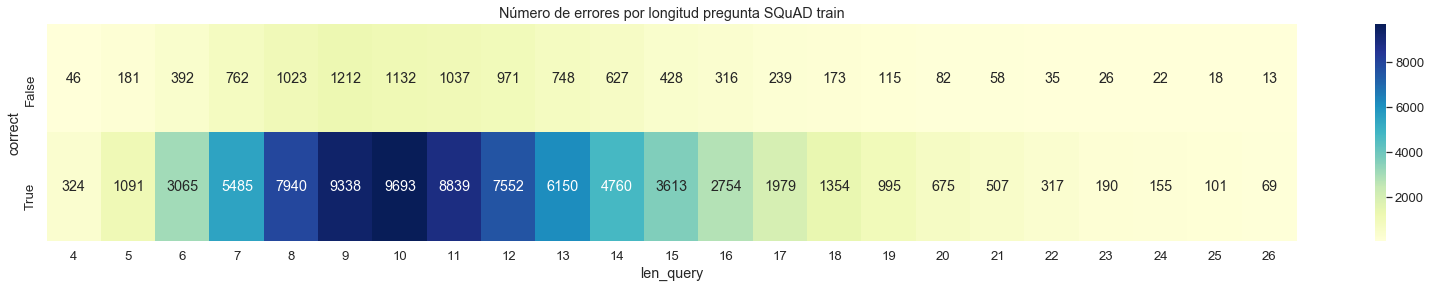

In [2548]:
COLUMN_PIVOT = 'len_query'
COLUMN_CORRECT = 'correct' #_'+model
MIN_PREGUNTAS = 10
MIN_PORC_ERROR = 3

new_df[COLUMN_PIVOT] = new_df[COLUMN_PIVOT].fillna('')
prev_pivot = new_df[['id',COLUMN_CORRECT, COLUMN_PIVOT]].groupby([COLUMN_CORRECT, COLUMN_PIVOT]).count().reset_index()
sum_pivot = new_df[['id', COLUMN_PIVOT]].groupby([COLUMN_PIVOT]).count().reset_index()
ids_con_errores = prev_pivot.loc[(prev_pivot[COLUMN_CORRECT] == False)&(prev_pivot['id'] > 0),COLUMN_PIVOT]
prev_pivot = prev_pivot.loc[prev_pivot[COLUMN_PIVOT].isin(ids_con_errores)]
for ids_err in ids_con_errores:
    prev_pivot.loc[(prev_pivot[COLUMN_PIVOT] == ids_err)&(prev_pivot[COLUMN_CORRECT] == False), 'porc'] = 100*prev_pivot.loc[(prev_pivot[COLUMN_PIVOT] == ids_err)&(prev_pivot[COLUMN_CORRECT] == False), 'id'].values[0] / sum_pivot.loc[sum_pivot[COLUMN_PIVOT] == ids_err,'id'].values[0]
    try:
        prev_pivot.loc[(prev_pivot[COLUMN_PIVOT] == ids_err)&(prev_pivot[COLUMN_CORRECT] == True), 'porc'] = 100*prev_pivot.loc[(prev_pivot[COLUMN_PIVOT] == ids_err)&(prev_pivot[COLUMN_CORRECT] == True), 'id'].values[0] / sum_pivot.loc[sum_pivot[COLUMN_PIVOT] == ids_err,'id'].values[0]
    except:
        pass

ids_con_errores_comunes = prev_pivot.loc[(prev_pivot[COLUMN_CORRECT] == False) 
                                         & (prev_pivot['id'] >= MIN_PREGUNTAS) & (prev_pivot['porc'] >= MIN_PORC_ERROR), COLUMN_PIVOT]
print(len(ids_con_errores_comunes))

prev_pivot = prev_pivot.loc[prev_pivot[COLUMN_PIVOT].isin(ids_con_errores_comunes)]
new_pivot = prev_pivot.pivot(index=COLUMN_CORRECT, columns=COLUMN_PIVOT, values='id')

sns.set(font_scale=1.2)
plt.figure(figsize=(28,4))
sns_heatmap = sns.heatmap(new_pivot, cmap="YlGnBu", yticklabels=new_pivot.index, xticklabels=new_pivot.columns, annot=True, fmt=".0f")
sns_heatmap.set_title("Número de errores por longitud pregunta SQuAD train") #+ model +

Text(0.5, 1.0, 'Número de errores por longitud pregunta SQuAD train')

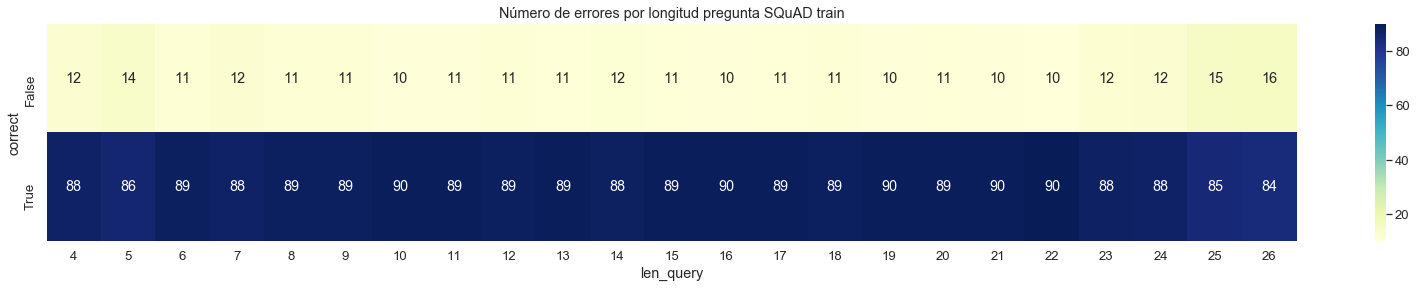

In [2549]:
prev_pivot = prev_pivot.loc[prev_pivot[COLUMN_PIVOT].isin(ids_con_errores_comunes)]
new_pivot = prev_pivot.pivot(index=COLUMN_CORRECT, columns=COLUMN_PIVOT, values='porc')

sns.set(font_scale=1.2)
plt.figure(figsize=(28,4))
sns_heatmap = sns.heatmap(new_pivot, cmap="YlGnBu", yticklabels=new_pivot.index, xticklabels=new_pivot.columns, annot=True, fmt=".0f")
sns_heatmap.set_title("Número de errores por longitud pregunta SQuAD train")

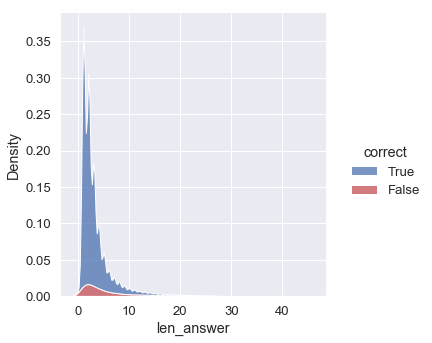

In [2521]:
#sns.displot(new_df, x="len_query", col="correct", stat="density")
#palette ={True: "b", False: "r"}
#sns.displot(new_df, x="len_query", col="correct", kind="kde", multiple="stack", palette=palette)
#sns.set(font_scale=1.2)
#plt.figure(figsize=(28,4))
sns.displot(new_df, x="len_answer", hue="correct", kind="kde",multiple="stack", palette=palette, hue_order=[True, False])
#sns_heatmap.set_title("Error por longitud pregunta " + model + "sobre SQuAD train")

28


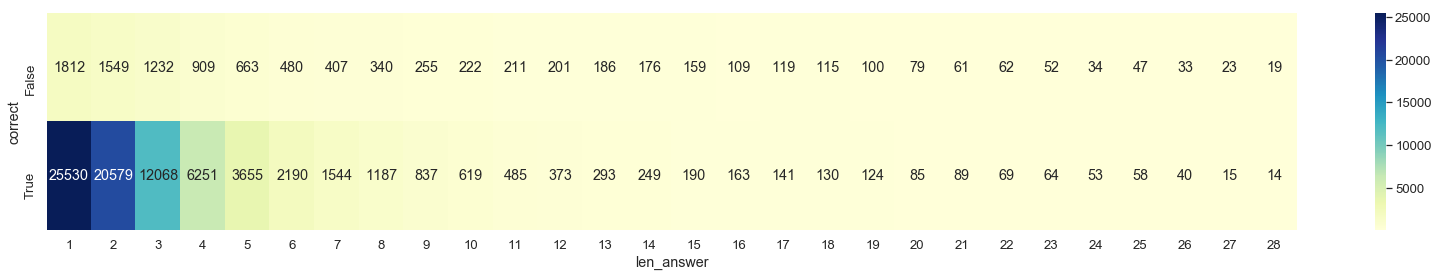

In [2550]:
COLUMN_PIVOT = 'len_answer'
COLUMN_CORRECT = 'correct' #_'+model
MIN_PREGUNTAS = 10
MIN_PORC_ERROR = 3

new_df[COLUMN_PIVOT] = new_df[COLUMN_PIVOT].fillna('')
prev_pivot = new_df[['id',COLUMN_CORRECT, COLUMN_PIVOT]].groupby([COLUMN_CORRECT, COLUMN_PIVOT]).count().reset_index()
sum_pivot = new_df[['id', COLUMN_PIVOT]].groupby([COLUMN_PIVOT]).count().reset_index()
ids_con_errores = prev_pivot.loc[(prev_pivot[COLUMN_CORRECT] == False)&(prev_pivot['id'] > 0),COLUMN_PIVOT]
prev_pivot = prev_pivot.loc[prev_pivot[COLUMN_PIVOT].isin(ids_con_errores)]
for ids_err in ids_con_errores:
    prev_pivot.loc[(prev_pivot[COLUMN_PIVOT] == ids_err)&(prev_pivot[COLUMN_CORRECT] == False), 'porc'] = 100*prev_pivot.loc[(prev_pivot[COLUMN_PIVOT] == ids_err)&(prev_pivot[COLUMN_CORRECT] == False), 'id'].values[0] / sum_pivot.loc[sum_pivot[COLUMN_PIVOT] == ids_err,'id'].values[0]
    try:
        prev_pivot.loc[(prev_pivot[COLUMN_PIVOT] == ids_err)&(prev_pivot[COLUMN_CORRECT] == True), 'porc'] = 100*prev_pivot.loc[(prev_pivot[COLUMN_PIVOT] == ids_err)&(prev_pivot[COLUMN_CORRECT] == True), 'id'].values[0] / sum_pivot.loc[sum_pivot[COLUMN_PIVOT] == ids_err,'id'].values[0]
    except:
        pass

ids_con_errores_comunes = prev_pivot.loc[(prev_pivot[COLUMN_CORRECT] == False) 
                                         & (prev_pivot['id'] >= MIN_PREGUNTAS) & (prev_pivot['porc'] >= MIN_PORC_ERROR), COLUMN_PIVOT]
print(len(ids_con_errores_comunes))

prev_pivot = prev_pivot.loc[prev_pivot[COLUMN_PIVOT].isin(ids_con_errores_comunes)]
new_pivot = prev_pivot.pivot(index=COLUMN_CORRECT, columns=COLUMN_PIVOT, values='id')

sns.set(font_scale=1.2)
plt.figure(figsize=(28,4))
sns_heatmap = sns.heatmap(new_pivot, cmap="YlGnBu", yticklabels=new_pivot.index, xticklabels=new_pivot.columns, annot=True, fmt=".0f")
#sns_heatmap.set_title("Error porcentual " + model + "sobre SQuAD train")
#sns_heatmap.set_title("Errores por longitud de respuesta SQuAD train")

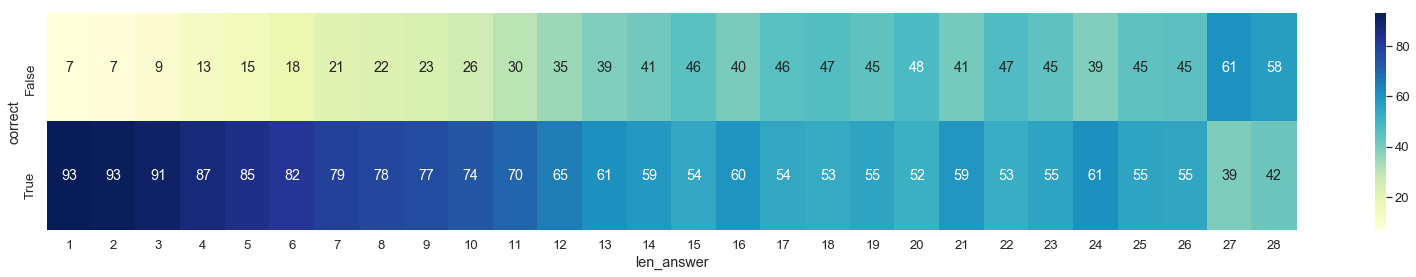

In [2551]:
new_pivot = prev_pivot.pivot(index=COLUMN_CORRECT, columns=COLUMN_PIVOT, values='porc')

sns.set(font_scale=1.2)
plt.figure(figsize=(28,4))
sns_heatmap = sns.heatmap(new_pivot, cmap="YlGnBu", yticklabels=new_pivot.index, xticklabels=new_pivot.columns, annot=True, fmt=".0f")
#sns_heatmap.set_title("Error porcentual " + model + "sobre SQuAD train")
#sns_heatmap.set_title("Errores por longitud de respuesta SQuAD train")

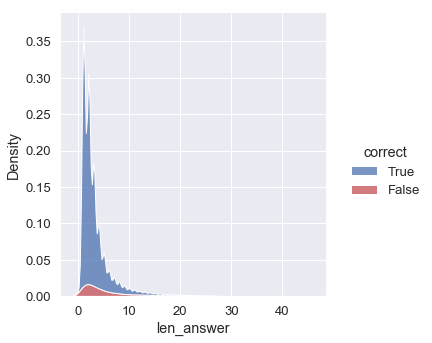

In [2519]:
sns.displot(new_df, x="len_answer", hue="correct", kind="kde", multiple="stack", palette=palette, hue_order=[True, False])

6


Text(0.5, 1.0, 'Número de errores sobre SQuAD train')

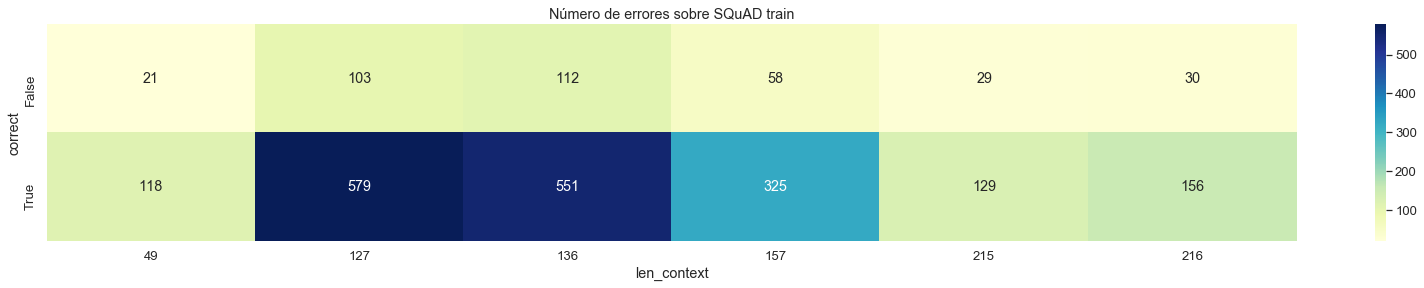

In [2531]:
COLUMN_PIVOT = 'len_context'
COLUMN_CORRECT = 'correct' #'_'+model
MIN_PREGUNTAS = 20
MIN_PORC_ERROR = 15

new_df[COLUMN_PIVOT] = new_df[COLUMN_PIVOT].fillna('')
prev_pivot = new_df[['id',COLUMN_CORRECT, COLUMN_PIVOT]].groupby([COLUMN_CORRECT, COLUMN_PIVOT]).count().reset_index()
sum_pivot = new_df[['id', COLUMN_PIVOT]].groupby([COLUMN_PIVOT]).count().reset_index()
ids_con_errores = prev_pivot.loc[(prev_pivot[COLUMN_CORRECT] == False)&(prev_pivot['id'] > 0),COLUMN_PIVOT]
prev_pivot = prev_pivot.loc[prev_pivot[COLUMN_PIVOT].isin(ids_con_errores)]
for ids_err in ids_con_errores:
    prev_pivot.loc[(prev_pivot[COLUMN_PIVOT] == ids_err)&(prev_pivot[COLUMN_CORRECT] == False), 'porc'] = 100*prev_pivot.loc[(prev_pivot[COLUMN_PIVOT] == ids_err)&(prev_pivot[COLUMN_CORRECT] == False), 'id'].values[0] / sum_pivot.loc[sum_pivot[COLUMN_PIVOT] == ids_err,'id'].values[0]
    try:
        prev_pivot.loc[(prev_pivot[COLUMN_PIVOT] == ids_err)&(prev_pivot[COLUMN_CORRECT] == True), 'porc'] = 100*prev_pivot.loc[(prev_pivot[COLUMN_PIVOT] == ids_err)&(prev_pivot[COLUMN_CORRECT] == True), 'id'].values[0] / sum_pivot.loc[sum_pivot[COLUMN_PIVOT] == ids_err,'id'].values[0]
    except:
        pass

ids_con_errores_comunes = prev_pivot.loc[(prev_pivot[COLUMN_CORRECT] == False) 
                                         & (prev_pivot['id'] >= MIN_PREGUNTAS) & (prev_pivot['porc'] >= MIN_PORC_ERROR), COLUMN_PIVOT]
print(len(ids_con_errores_comunes))

prev_pivot = prev_pivot.loc[prev_pivot[COLUMN_PIVOT].isin(ids_con_errores_comunes)]
new_pivot = prev_pivot.pivot(index=COLUMN_CORRECT, columns=COLUMN_PIVOT, values='id')

sns.set(font_scale=1.2)
plt.figure(figsize=(28,4))
sns_heatmap = sns.heatmap(new_pivot, cmap="YlGnBu", yticklabels=new_pivot.index, xticklabels=new_pivot.columns, annot=True, fmt=".0f")
sns_heatmap.set_title("Número de errores " + model + "sobre SQuAD train")

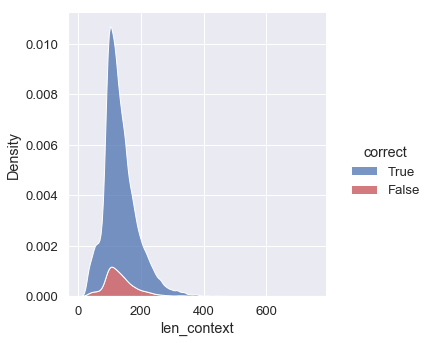

In [2518]:
sns.displot(new_df, x="len_context", hue="correct", kind="kde", multiple="stack", palette=palette, hue_order=[True, False])

In [2475]:
#sns.pairplot(new_df[['len_query', 'len_answer', 'len_context', 'correct']], hue='correct', palette=palette, hue_order=[True, False])

c:\users\larao_000\appdata\local\programs\python\python37\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

c:\users\larao_000\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

c:\users\larao_000\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

c:\users\larao_000\appdata\local\programs\python\python37\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning:

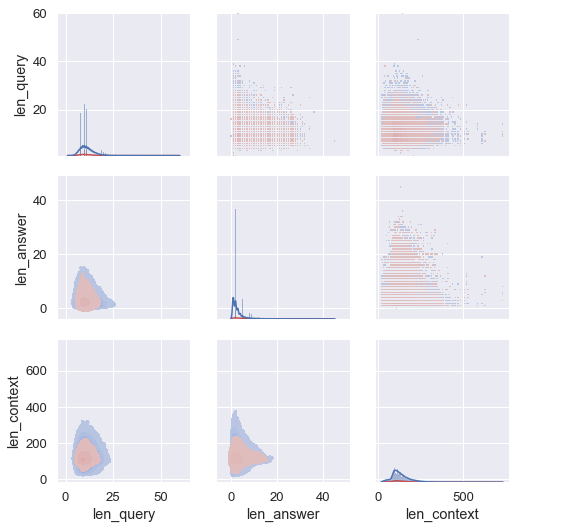

In [2522]:
g = sns.PairGrid(new_df[['len_query', 'len_answer', 'len_context', 'correct']], hue='correct', palette=palette, hue_order=[True, False])
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)

In [1848]:
new_df.columns

Index(['title', 'id', 'query', 'answer', 'impossible', 'plausible', 'dataset',
       'context', 'query_ner', 'answer_ner', 'answer_ner_tags', 'query_pos',
       'answer_pos', 'foco', 'foco_norm', 'query_cuatrigrams_pos',
       'query_cuatrigrams', 'query_trigrams_pos', 'query_trigrams',
       'query_unigrams', 'query_unigrams_pos', 'answer_red_pos',
       'answer_pral_pos', 'validation_foco_ner', 'len_query', 'len_context',
       'len_answer', 'context_ner', 'valhalla/t5-base-squad', 'answer_model',
       'correct'],
      dtype='object')

22


Text(0.5, 1.0, 'Número de errores sobre SQuAD train')

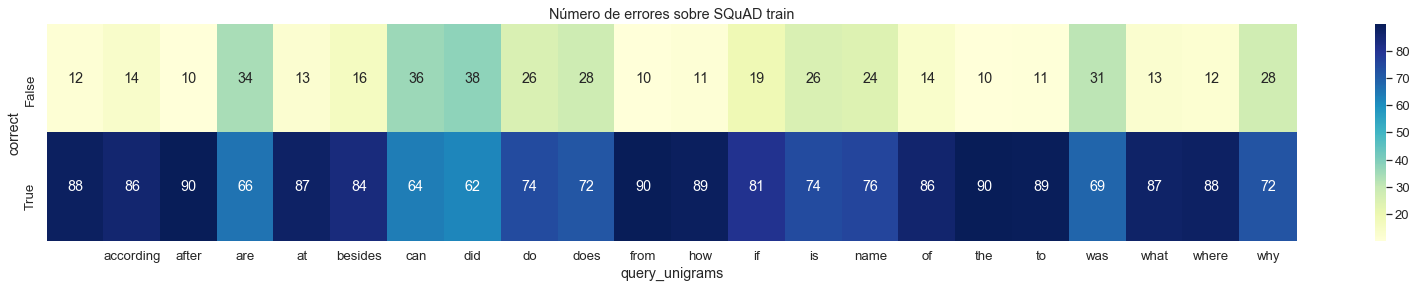

In [2682]:
COLUMN_PIVOT = 'query_unigrams'
COLUMN_CORRECT = 'correct' #_'+model
MIN_PREGUNTAS = 15
MIN_PORC_ERROR = 10

new_df[COLUMN_PIVOT] = new_df[COLUMN_PIVOT].fillna('')
prev_pivot = new_df[['id',COLUMN_CORRECT, COLUMN_PIVOT]].groupby([COLUMN_CORRECT, COLUMN_PIVOT]).count().reset_index()
sum_pivot = new_df[['id', COLUMN_PIVOT]].groupby([COLUMN_PIVOT]).count().reset_index()
ids_con_errores = prev_pivot.loc[(prev_pivot[COLUMN_CORRECT] == False)&(prev_pivot['id'] > 0),COLUMN_PIVOT]
prev_pivot = prev_pivot.loc[prev_pivot[COLUMN_PIVOT].isin(ids_con_errores)]
for ids_err in ids_con_errores:
    prev_pivot.loc[(prev_pivot[COLUMN_PIVOT] == ids_err)&(prev_pivot[COLUMN_CORRECT] == False), 'porc'] = 100*prev_pivot.loc[(prev_pivot[COLUMN_PIVOT] == ids_err)&(prev_pivot[COLUMN_CORRECT] == False), 'id'].values[0] / sum_pivot.loc[sum_pivot[COLUMN_PIVOT] == ids_err,'id'].values[0]
    try:
        prev_pivot.loc[(prev_pivot[COLUMN_PIVOT] == ids_err)&(prev_pivot[COLUMN_CORRECT] == True), 'porc'] = 100*prev_pivot.loc[(prev_pivot[COLUMN_PIVOT] == ids_err)&(prev_pivot[COLUMN_CORRECT] == True), 'id'].values[0] / sum_pivot.loc[sum_pivot[COLUMN_PIVOT] == ids_err,'id'].values[0]
    except:
        pass

ids_con_errores_comunes = prev_pivot.loc[(prev_pivot[COLUMN_CORRECT] == False) 
                                         & (prev_pivot['id'] >= MIN_PREGUNTAS) & (prev_pivot['porc'] >= MIN_PORC_ERROR), COLUMN_PIVOT]
print(len(ids_con_errores_comunes))

prev_pivot = prev_pivot.loc[prev_pivot[COLUMN_PIVOT].isin(ids_con_errores_comunes)]
new_pivot = prev_pivot.pivot(index=COLUMN_CORRECT, columns=COLUMN_PIVOT, values='porc')

sns.set(font_scale=1.2)
plt.figure(figsize=(28,4))
sns_heatmap = sns.heatmap(new_pivot, cmap="YlGnBu", yticklabels=new_pivot.index, xticklabels=new_pivot.columns, annot=True, fmt=".0f")
sns_heatmap.set_title("Número de errores " + model + "sobre SQuAD train")

#### Error patterns with POSTagging

Text(0.5, 1.0, 'Número de errores por tipo de respuesta por análisis sintáctico')

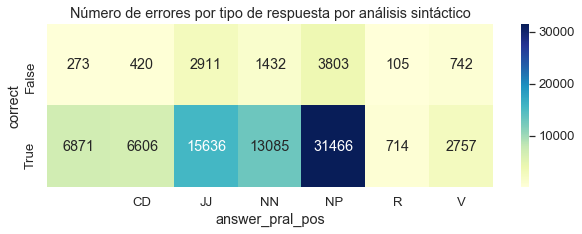

In [2535]:
COLUMN_PIVOT = 'answer_pral_pos'
COLUMN_CORRECT = 'correct'#_'+model

new_df[COLUMN_PIVOT] = new_df[COLUMN_PIVOT].fillna('')
new_pivot = new_df[['id',COLUMN_CORRECT, COLUMN_PIVOT]].groupby([COLUMN_CORRECT, COLUMN_PIVOT]).count().reset_index().pivot(index=COLUMN_CORRECT, columns=COLUMN_PIVOT, values='id')
plt.figure(figsize=(10,3))
sns_heatmap = sns.heatmap(new_pivot, cmap="YlGnBu", yticklabels=new_pivot.index, xticklabels=new_pivot.columns, annot=True, fmt="d")
sns_heatmap.set_title("Número de errores por tipo de respuesta por análisis sintáctico")

Text(0.5, 1.0, 'Número de errores por tipo de respuesta por análisis sintáctico')

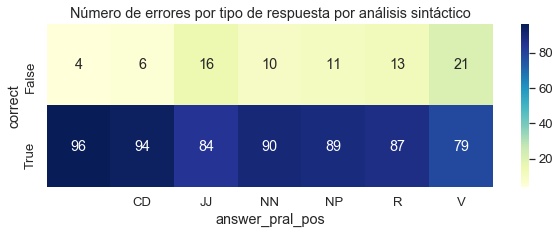

In [2689]:
COLUMN_PIVOT = 'answer_pral_pos'
COLUMN_CORRECT = 'correct'#_'+model

new_df[COLUMN_PIVOT] = new_df[COLUMN_PIVOT].fillna('')
new_pivot = new_df[['id',COLUMN_CORRECT, COLUMN_PIVOT]].groupby([COLUMN_CORRECT, COLUMN_PIVOT]).count().reset_index().pivot(index=COLUMN_CORRECT, columns=COLUMN_PIVOT, values='id')
plt.figure(figsize=(10,3))

prev_pivot = new_df[['id',COLUMN_CORRECT, COLUMN_PIVOT]].groupby([COLUMN_CORRECT, COLUMN_PIVOT]).count().reset_index()
sum_pivot = new_df[['id', COLUMN_PIVOT]].groupby([COLUMN_PIVOT]).count().reset_index()
ids_con_errores = prev_pivot.loc[(prev_pivot[COLUMN_CORRECT] == False)&(prev_pivot['id'] > 0),COLUMN_PIVOT]
prev_pivot = prev_pivot.loc[prev_pivot[COLUMN_PIVOT].isin(ids_con_errores)]
for ids_err in ids_con_errores:
    prev_pivot.loc[(prev_pivot[COLUMN_PIVOT] == ids_err)&(prev_pivot[COLUMN_CORRECT] == False), 'porc'] = 100*prev_pivot.loc[(prev_pivot[COLUMN_PIVOT] == ids_err)&(prev_pivot[COLUMN_CORRECT] == False), 'id'].values[0] / sum_pivot.loc[sum_pivot[COLUMN_PIVOT] == ids_err,'id'].values[0]
    try:
        prev_pivot.loc[(prev_pivot[COLUMN_PIVOT] == ids_err)&(prev_pivot[COLUMN_CORRECT] == True), 'porc'] = 100*prev_pivot.loc[(prev_pivot[COLUMN_PIVOT] == ids_err)&(prev_pivot[COLUMN_CORRECT] == True), 'id'].values[0] / sum_pivot.loc[sum_pivot[COLUMN_PIVOT] == ids_err,'id'].values[0]
    except:
        pass
new_pivot = prev_pivot.pivot(index=COLUMN_CORRECT, columns=COLUMN_PIVOT, values='porc')
sns_heatmap = sns.heatmap(new_pivot, cmap="YlGnBu", yticklabels=new_pivot.index, xticklabels=new_pivot.columns, annot=True, fmt=".0f")
sns_heatmap.set_title("Número de errores por tipo de respuesta por análisis sintáctico")

27


Text(0.5, 1.0, 'Número de errores por tipo de trigrama sintáctico')

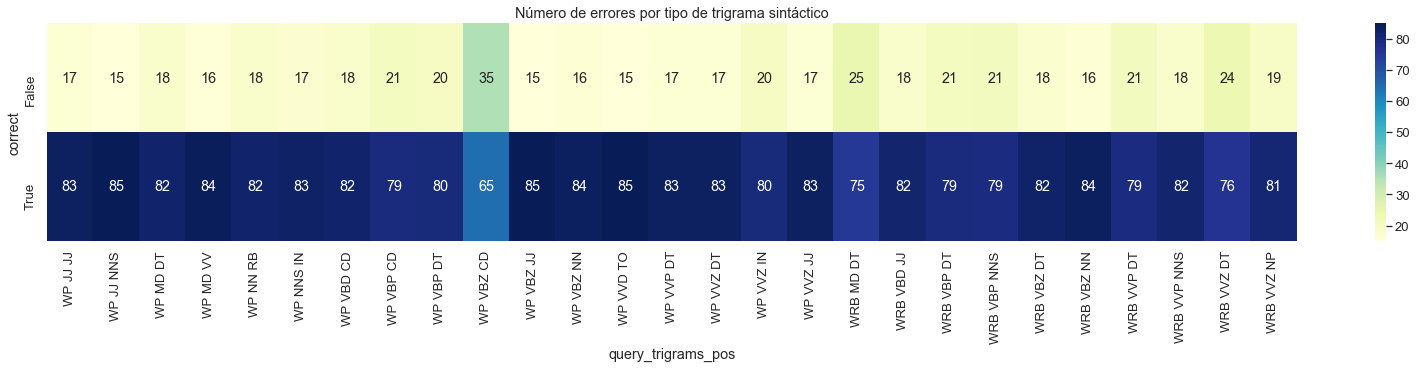

In [2683]:
COLUMN_PIVOT = 'query_trigrams_pos'
COLUMN_CORRECT = 'correct'#_'+model
MIN_PREGUNTAS = 20
MIN_PORC_ERROR = 15

new_df[COLUMN_PIVOT] = new_df[COLUMN_PIVOT].fillna('')
prev_pivot = new_df[['id',COLUMN_CORRECT, COLUMN_PIVOT]].groupby([COLUMN_CORRECT, COLUMN_PIVOT]).count().reset_index()
sum_pivot = new_df[['id', COLUMN_PIVOT]].groupby([COLUMN_PIVOT]).count().reset_index()
ids_con_errores = prev_pivot.loc[(prev_pivot[COLUMN_CORRECT] == False)&(prev_pivot['id'] > 0),COLUMN_PIVOT]
prev_pivot = prev_pivot.loc[prev_pivot[COLUMN_PIVOT].isin(ids_con_errores)]
for ids_err in ids_con_errores:
    prev_pivot.loc[(prev_pivot[COLUMN_PIVOT] == ids_err)&(prev_pivot[COLUMN_CORRECT] == False), 'porc'] = 100*prev_pivot.loc[(prev_pivot[COLUMN_PIVOT] == ids_err)&(prev_pivot[COLUMN_CORRECT] == False), 'id'].values[0] / sum_pivot.loc[sum_pivot[COLUMN_PIVOT] == ids_err,'id'].values[0]
    try:
        prev_pivot.loc[(prev_pivot[COLUMN_PIVOT] == ids_err)&(prev_pivot[COLUMN_CORRECT] == True), 'porc'] = 100*prev_pivot.loc[(prev_pivot[COLUMN_PIVOT] == ids_err)&(prev_pivot[COLUMN_CORRECT] == True), 'id'].values[0] / sum_pivot.loc[sum_pivot[COLUMN_PIVOT] == ids_err,'id'].values[0]
    except:
        pass

ids_con_errores_comunes = prev_pivot.loc[(prev_pivot[COLUMN_CORRECT] == False) 
                                         & (prev_pivot['id'] >= MIN_PREGUNTAS) & (prev_pivot['porc'] >= MIN_PORC_ERROR), COLUMN_PIVOT]
print(len(ids_con_errores_comunes))

prev_pivot = prev_pivot.loc[prev_pivot[COLUMN_PIVOT].isin(ids_con_errores_comunes)]
new_pivot = prev_pivot.pivot(index=COLUMN_CORRECT, columns=COLUMN_PIVOT, values='porc')

sns.set(font_scale=1.2)
plt.figure(figsize=(28,4))
sns_heatmap = sns.heatmap(new_pivot, cmap="YlGnBu", yticklabels=new_pivot.index, xticklabels=new_pivot.columns, annot=True, fmt=".0f")
sns_heatmap.set_title("Número de errores por tipo de trigrama sintáctico")

In [2526]:
new_df.columns

Index(['Unnamed: 0', 'id', 'query', 'answer', 'impossible', 'plausible',
       'dataset', 'context', 'query_ner', 'answer_ner', 'answer_ner_tags',
       'query_pos', 'answer_pos', 'foco', 'foco_norm', 'query_unigrams',
       'query_unigrams_pos', 'query_trigrams_pos', 'query_trigrams',
       'query_cuatrigrams_pos', 'query_cuatrigrams', 'answer_red_pos',
       'answer_pral_pos', 'validation_foco_ner', 'len_query', 'len_context',
       'len_answer', 'context_ner', 'phiyodr/bert-base-finetuned-squad2',
       'phiyodr/bert-large-finetuned-squad2', 'deepset/roberta-base-squad2',
       'phiyodr/roberta-large-finetuned-squad2', 'valhalla/t5-base-squad',
       'phiyodr/bert-base-finetuned-squad2_json',
       'score_phiyodr/bert-base-finetuned-squad2',
       'answer_model_phiyodr/bert-base-finetuned-squad2',
       'correct_phiyodr/bert-base-finetuned-squad2',
       'phiyodr/bert-large-finetuned-squad2_json',
       'score_phiyodr/bert-large-finetuned-squad2',
       'answer_model_

##### Errores cometidos por otras entidades del texto 

In [2482]:
import re
def preprocess_text(text_str):
    regular_expr = re.compile('\n|\r|\t|\(|\)|\[|\]|:|\,|\;|"|\?|\-|\%')
    text_str = re.sub(regular_expr, ' ', text_str)
    token_list = text_str.split(' ')
    token_list = [element for element in token_list if element]
    return ' '.join(token_list)

from stanfordcorenlp import StanfordCoreNLP
# https://www.khalidalnajjar.com/setup-use-stanford-corenlp-server-python/
# https://stanfordnlp.github.io/CoreNLP/index.html#download
# https://stanfordnlp.github.io/stanfordnlp/corenlp_client.html
nlp = StanfordCoreNLP('http://localhost', port=9000, timeout=30000)
props = {'annotators': 'tokenize,ssplit,pos,lemma,ner,parse,depparse,dcoref,relation',
          'pipelineLanguage': 'en',
          'outputFormat': 'json'
        }

def filter_ner_relevant(tuple_list):
    ner_dictionary = {}
    previous_ner = 'O'
    for element in tuple_list:
        if element[1] != 'O':
            if element[1] == previous_ner:
                ner_dictionary[element[1]][-1] += ' ' + element[0]
            elif element[1] in ner_dictionary.keys():
                ner_dictionary[element[1]].append(element[0])
            else:
                ner_dictionary[element[1]] = [element[0]]    
        previous_ner = element[1]
    return ner_dictionary

In [2492]:
new_df_error = new_df.loc[(new_df['correct_'+model] == False) & (new_df['impossible'] == False)].copy()

In [2490]:
new_df_error.head()

Unnamed: 0                        id  \
36           36  56d43f7e2ccc5a1400d830c8   
90           90  56be8d423aeaaa14008c90b3   
118         118  56bf8c8aa10cfb140055116e   
151         151  56be932e3aeaaa14008c90fb   
152         152  56be932e3aeaaa14008c90fc   

                                                 query                answer  \
36   After leaving Destiny's Child, how many record...           118 million   
90   What event occured after she was publicly crit...    boyfriend left her   
118  What song was the lead single from the film's ...  Fighting Temptations   
151  How many countries did her song "Irreplaceable...                  five   
152     How many singles did her second album produce?                  five   

     impossible  plausible dataset  \
36        False        NaN   train   
90        False        NaN   train   
118       False        NaN   train   
151       False        NaN   train   
152       False        NaN   train   

                                               context  \
36   A self-described "modern-day feminist", Beyonc...   
90   LeToya Luckett and Roberson became unhappy wit...   
118  In July 2002, Beyoncé continued her acting car...   
151  Beyoncé's second solo album B'Day was released...   
152  Beyoncé's second solo album B'Day was released...   

                   query_ner                   answer_ner  ...  \
36   {'PERSON': ['Beyoncé']}  {'NUMBER': ['118 million']}  ...   
90                        {}                           {}  ...   
118                       {}                           {}  ...   
151      {'NUMBER': ['one']}         {'NUMBER': ['five']}  ...   
152  {'ORDINAL': ['second']}         {'NUMBER': ['five']}  ...   

    answer_model_phiyodr/roberta-large-finetuned-squad2  \
36                                         118 million    
90                Her long-standing boyfriend left her    
118                                Fighting Temptation    
151                                               five    
152                                               five    

    correct_phiyodr/roberta-large-finetuned-squad2  \
36                                            True   
90                                            True   
118                                           True   
151                                           True   
152                                           True   

                    answer_modelvalhalla/t5-base-squad  \
36                                          60 million   
90                                               split   
118                                      "Work It Out"   
151  Australia, Hungary, Ireland, New Zealand and t...   
152                                              three   

                   answer_model_valhalla/t5-base-squad  \
36                                          60 million   
90                                               split   
118                                      "Work It Out"   
151  Australia, Hungary, Ireland, New Zealand and t...   
152                                              three   

    correct_valhalla/t5-base-squad           error_by correct_by correct  \
36                           False           BERT, T5    RoBERTa    True   
90                           False           BERT, T5    RoBERTa    True   
118                          False        RoBERTa, T5       BERT    True   
151                          False        RoBERTa, T5       BERT    True   
152                          False  BERT, RoBERTa, T5              False   

    models_answers      answer_model_processed_valhalla/t5-base-squad  
36         RoBERTa                                         60 million  
90         RoBERTa                                              split  
118           BERT                                        Work It Out  
151           BERT  Australia Hungary Ireland New Zealand and the ...  
152                                                             three  

[5 rows x 

In [2763]:
new_df_error['answer_model_'+model]= new_df_error['answer_model_'+model].fillna('')
new_df_error['answer_model_processed_'+model] = new_df_error['answer_model_'+model].apply(preprocess_text)
new_df_error['answer_model_processed_'+model]= new_df_error['answer_model_processed_'+model].fillna('')
new_df_error['answer_model_ner_'+model] = new_df_error['answer_model_processed_'+model].apply(nlp.ner)
new_df_error['answer_model_ner_'+model] = new_df_error['answer_model_ner_'+model].apply(filter_ner_relevant)

In [ ]:
new_df_error['answer_model_ner_tags_'+model] = new_df_error['answer_model_ner_'+model].apply(lambda x: str(get_ner_tags(load_data(x))))

In [ ]:
new_df_error.columns

In [ ]:
new_df = new_df.merge(new_df_error[['id', 'answer_model_ner_'+model, 'answer_model_ner_tags_'+model]], on='id', how='left')

In [2116]:
comparison = new_df.loc[(new_df['impossible']==False)&(new_df['correct_'+model]==False)].copy()

In [1678]:
#plot_cm(comparison['answer_ner_tags'], comparison['answer_model_ner_tags'], figsize=(10,10))

In [2118]:
error_types_ner_confusion = comparison[['id','answer_ner_tags', 'answer_model_ner_tags_'+model]].groupby(['answer_ner_tags', 'answer_model_ner_tags_'+model]).count()
error_types_ner_confusion = error_types_ner_confusion.reset_index()
total_answer_ner_tags = new_df[['id', 'answer_ner_tags']].groupby(['answer_ner_tags']).count()
total_answer_ner_tags['total'] = total_answer_ner_tags['id']
total_answer_ner_tags = total_answer_ner_tags.reset_index()
error_types_ner_confusion = error_types_ner_confusion.merge(total_answer_ner_tags[['answer_ner_tags', 'total']], on='answer_ner_tags')

error_types_ner_confusion['perc'] = error_types_ner_confusion['id'] / error_types_ner_confusion['total']
error_types_ner_confusion = error_types_ner_confusion.sort_values(['total', 'perc'], ascending=[False, False])

In [2119]:
print(len(new_df.loc[(new_df['answer_ner_tags'] == "['PERSON']")]))

11192


In [2120]:
comparison.loc[(comparison['answer_ner_tags'] == "['NUMBER']") 
               & (comparison['answer_model_ner_tags_'+model] == "['NUMBER']"),
               ['id','query', 'answer', 'answer_model_'+model, 'context_ner', 'context']]

id  \
36     56d43f7e2ccc5a1400d830c8   
1095   56cfddc4234ae51400d9bfa1   
1324   56cfee5d234ae51400d9c0f7   
1748   56ce726faab44d1400b88793   
1752   56cc55fa6d243a140015ef15   
...                         ...   
84937  5733b5a64776f419006610fc   
85863  57343e3a4776f41900661aee   
85866  57343e3a4776f41900661af1   
86613  5735a9fbe853931400426ab2   
86658  5735b876dc94161900571f4b   

                                                   query  \
36     After leaving Destiny's Child, how many record...   
1095                    How many doctors visited Chopin?   
1324   How many polonaises were published while Chopi...   
1748      How many versions of the iPod currently exist?   
1752   What is the smallest data capacity for an iPod...   
...                                                  ...   
84937                       Where exactly is Tajikistan?   
85863  As of 2000, how many people lived in Richmond ...   
85866  In 2000, what percentage of Richmond residents...   
86613  What is the Kathmandu Valley's average tempera...   
86658  About how many people are likely to live in Ka...   

                                                  answer  \
36                                           118 million   
1095                                                   3   
1324                                               seven   
1748                                                   3   
1752                                                2 GB   
...                                                  ...   
84937  between latitudes 36° and 41° N (a small area ...   
85863                                            1,271.3   
85866                                                1.5   
86613                                               50.2   
86658                                          1,319,597   

      answer_model_phiyodr/bert-base-finetuned-squad2  \
36                                         60 million   
1095                                            Three   
1324                                             nine   
1748                                            three   
1752                                           128 GB   
...                                               ...   
84937  It lies mostly between latitudes 36° and 41° N   
85863                                         3,292.6   
85866                                            2.6%   
86613                                         10.1 °C   
86658                                             161   

                                             context_ner  \
36     {'DURATION': ['day', '19 years', 'decade'], 'I...   
1095   {'DATE': ['3 December', 'the second', 'Decembe...   
1324   {'PERSON': ['Chopin', 'Chopin', 'Chopin'], 'NA...   
1748   {'ORGANIZATION': ['Apple Inc'], 'ORDINAL': ['f...   
1752   {'TITLE': ['model'], 'NUMBER': ['2', '128', '1...   
...                                                  ...   
84937  {'COUNTRY': ['Tajikistan'], 'LOCATION': ['Cent...   
85863  {'DATE': ['2000'], 'NUMBER': ['197 790', '84 5...   
85866  {'DATE': ['2000'], 'NUMBER': ['197 790', '84 5...   
86613  {'NUMBER': ['Five', '1 200', '2 300', '3 900',...   
86658  {'DURATION': ['the years', 'one decade'], 'NUM...   

                                                 context  
36     A self-described "modern-day feminist", Beyonc...  
1095   On 3 December, Chopin complained about his bad...  
1324   Chopin also endowed popular dance forms with a...  
1748   The iPod is a line of portable media players a...  
1752   Like other digital music players, iPods can se...  
...                                                  ...  
84937  Tajikistan is landlocked, and is the smallest ...  
85863  As of the census of 2000, there were 197,790 p...  
85866  As of the census of 2000, there were 197,790 p...  
86613  Five major climatic regions are found in Nepal...  
86658  Over the years the city has been home to peopl...  

[199 rows x 6 columns]

17


Text(0.5, 1.0, 'Número de errores por tipo de entidad de respuesta SQuAD train')

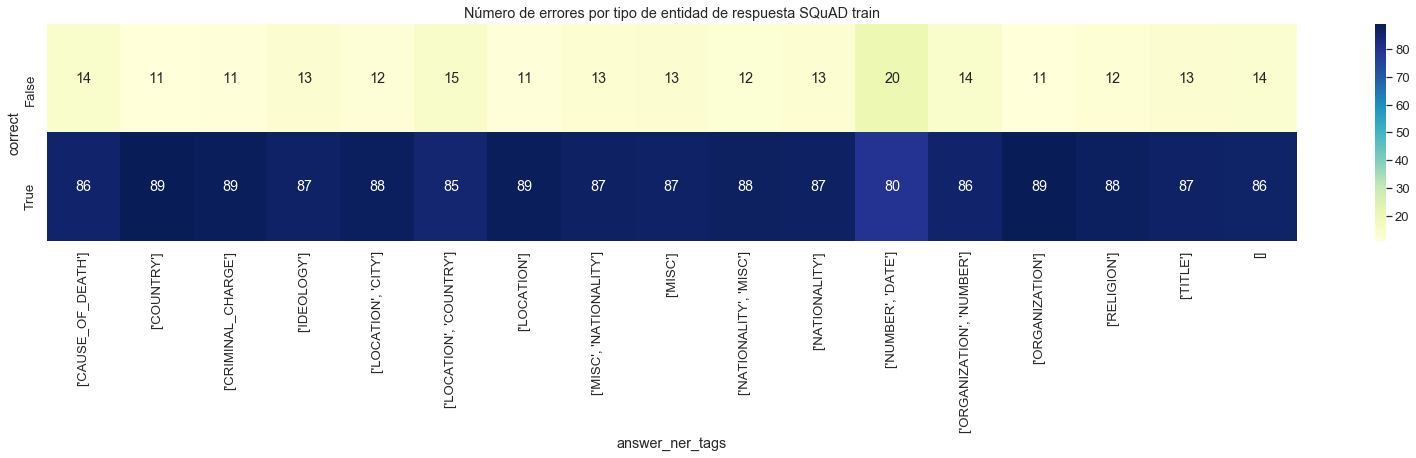

In [2695]:
COLUMN_PIVOT = 'answer_ner_tags'
COLUMN_CORRECT = 'correct'#_'+model
MIN_PREGUNTAS = 15
MIN_PORC_ERROR = 10

new_df[COLUMN_PIVOT] = new_df[COLUMN_PIVOT].fillna('')
prev_pivot = new_df[['id',COLUMN_CORRECT, COLUMN_PIVOT]].groupby([COLUMN_CORRECT, COLUMN_PIVOT]).count().reset_index()
sum_pivot = new_df[['id', COLUMN_PIVOT]].groupby([COLUMN_PIVOT]).count().reset_index()
ids_con_errores = prev_pivot.loc[(prev_pivot[COLUMN_CORRECT] == False)&(prev_pivot['id'] > 0),COLUMN_PIVOT]
prev_pivot = prev_pivot.loc[prev_pivot[COLUMN_PIVOT].isin(ids_con_errores)]
for ids_err in ids_con_errores:
    prev_pivot.loc[(prev_pivot[COLUMN_PIVOT] == ids_err)&(prev_pivot[COLUMN_CORRECT] == False), 'porc'] = 100*prev_pivot.loc[(prev_pivot[COLUMN_PIVOT] == ids_err)&(prev_pivot[COLUMN_CORRECT] == False), 'id'].values[0] / sum_pivot.loc[sum_pivot[COLUMN_PIVOT] == ids_err,'id'].values[0]
    try:
        prev_pivot.loc[(prev_pivot[COLUMN_PIVOT] == ids_err)&(prev_pivot[COLUMN_CORRECT] == True), 'porc'] = 100*prev_pivot.loc[(prev_pivot[COLUMN_PIVOT] == ids_err)&(prev_pivot[COLUMN_CORRECT] == True), 'id'].values[0] / sum_pivot.loc[sum_pivot[COLUMN_PIVOT] == ids_err,'id'].values[0]
    except:
        pass

ids_con_errores_comunes = prev_pivot.loc[(prev_pivot[COLUMN_CORRECT] == False) 
                                         & (prev_pivot['id'] >= MIN_PREGUNTAS) & (prev_pivot['porc'] >= MIN_PORC_ERROR), COLUMN_PIVOT]
print(len(ids_con_errores_comunes))

prev_pivot = prev_pivot.loc[prev_pivot[COLUMN_PIVOT].isin(ids_con_errores_comunes)]
new_pivot = prev_pivot.pivot(index=COLUMN_CORRECT, columns=COLUMN_PIVOT, values='porc')

sns.set(font_scale=1.2)
plt.figure(figsize=(28,4))
sns_heatmap = sns.heatmap(new_pivot, cmap="YlGnBu", yticklabels=new_pivot.index, xticklabels=new_pivot.columns, annot=True, fmt=".0f")
sns_heatmap.set_title("Número de errores por tipo de entidad de respuesta SQuAD train")

In [2126]:
prev_pivot = prev_pivot.sort_values(['correct_'+model, 'porc'], ascending=[True, False])
#prev_pivot

In [2125]:
prev_pivot.to_excel('datasets/squad/models/relations-'+ model.replace('/','-') + '-SQUAD-train-queries.xlsx', index=False)

#### Error patterns with focus

36


Text(0.5, 1.0, 'Número de errores por tipo de foco SQuAD train')

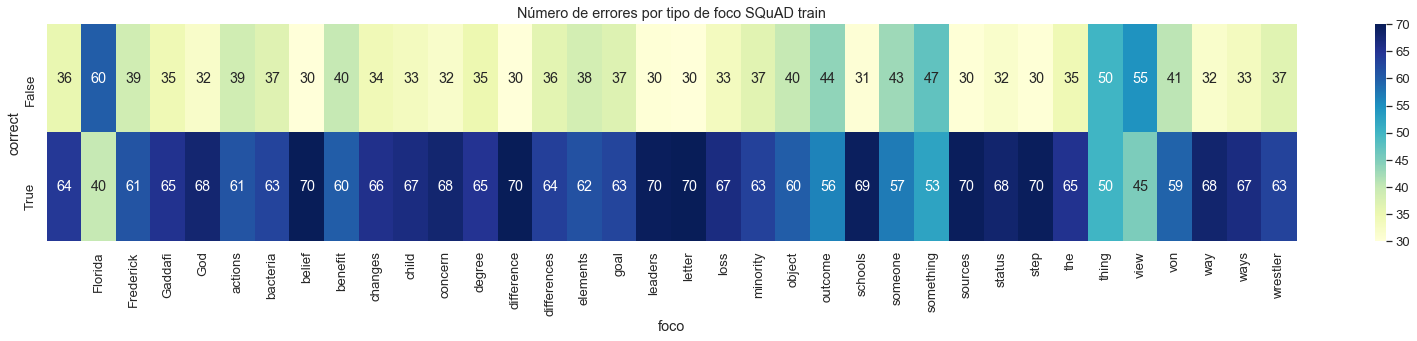

In [2685]:
COLUMN_PIVOT = 'foco'
COLUMN_CORRECT = 'correct'#_'+model
MIN_PREGUNTAS = 7
MIN_PORC_ERROR = 30

new_df[COLUMN_PIVOT] = new_df[COLUMN_PIVOT].fillna('')
prev_pivot = new_df[['id',COLUMN_CORRECT, COLUMN_PIVOT]].groupby([COLUMN_CORRECT, COLUMN_PIVOT]).count().reset_index()
sum_pivot = new_df[['id', COLUMN_PIVOT]].groupby([COLUMN_PIVOT]).count().reset_index()
ids_con_errores = prev_pivot.loc[(prev_pivot[COLUMN_CORRECT] == False)&(prev_pivot['id'] > 0),COLUMN_PIVOT]
prev_pivot = prev_pivot.loc[prev_pivot[COLUMN_PIVOT].isin(ids_con_errores)]
for ids_err in ids_con_errores:
    prev_pivot.loc[(prev_pivot[COLUMN_PIVOT] == ids_err)&(prev_pivot[COLUMN_CORRECT] == False), 'porc'] = 100*prev_pivot.loc[(prev_pivot[COLUMN_PIVOT] == ids_err)&(prev_pivot[COLUMN_CORRECT] == False), 'id'].values[0] / sum_pivot.loc[sum_pivot[COLUMN_PIVOT] == ids_err,'id'].values[0]
    try:
        prev_pivot.loc[(prev_pivot[COLUMN_PIVOT] == ids_err)&(prev_pivot[COLUMN_CORRECT] == True), 'porc'] = 100*prev_pivot.loc[(prev_pivot[COLUMN_PIVOT] == ids_err)&(prev_pivot[COLUMN_CORRECT] == True), 'id'].values[0] / sum_pivot.loc[sum_pivot[COLUMN_PIVOT] == ids_err,'id'].values[0]
    except:
        pass

ids_con_errores_comunes = prev_pivot.loc[(prev_pivot[COLUMN_CORRECT] == False) 
                                         & (prev_pivot['id'] >= MIN_PREGUNTAS) & (prev_pivot['porc'] >= MIN_PORC_ERROR), COLUMN_PIVOT]
print(len(ids_con_errores_comunes))

prev_pivot = prev_pivot.loc[prev_pivot[COLUMN_PIVOT].isin(ids_con_errores_comunes)]
new_pivot = prev_pivot.pivot(index=COLUMN_CORRECT, columns=COLUMN_PIVOT, values='porc')

sns.set(font_scale=1.2)
plt.figure(figsize=(28,4))
sns_heatmap = sns.heatmap(new_pivot, cmap="YlGnBu", yticklabels=new_pivot.index, xticklabels=new_pivot.columns, annot=True, fmt=".0f")
sns_heatmap.set_title("Número de errores por tipo de foco SQuAD train")

In [414]:
new_df['query_ner_tags'] = new_df['query_ner'].apply(lambda x: str(sorted(load_data(x).keys())))
new_df['answer_ner_tags'] = new_df['answer_ner'].apply(lambda x: str(sorted(load_data(x).keys())))

#### Error patterns with focus and NER association

In [1585]:
#validation_df = new_df[new_df['validation_foco_ner'].apply(filter_validation_ner)].copy()               

In [1586]:
#annot_pivot(new_pivot)

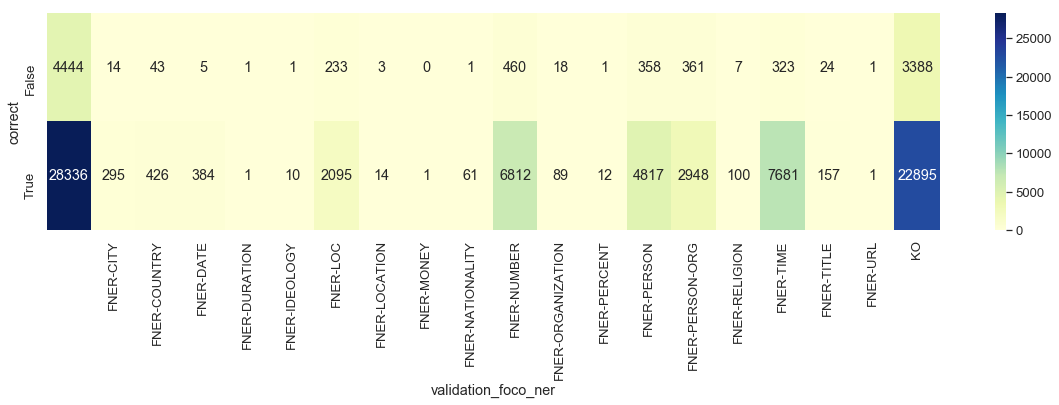

In [2697]:
COLUMN_PIVOT = 'validation_foco_ner'
COLUMN_CORRECT = 'correct'#_'+model

new_df[COLUMN_PIVOT] = new_df[COLUMN_PIVOT].apply(lambda x: x.replace('OK-','FNER-'))
new_df[COLUMN_PIVOT] = new_df[COLUMN_PIVOT].fillna('')
new_pivot = new_df[['id',COLUMN_CORRECT, COLUMN_PIVOT]].groupby([COLUMN_CORRECT, COLUMN_PIVOT]).count().reset_index().pivot(index=COLUMN_CORRECT, columns=COLUMN_PIVOT, values='id')
new_pivot = new_pivot.fillna(0.0)
new_pivot = new_pivot.astype(int)

plt.figure(figsize=(20,4))
sns_heatmap = sns.heatmap(new_pivot, cmap="YlGnBu", yticklabels=new_pivot.index, xticklabels=new_pivot.columns, annot=True, fmt="d")
# annot=annot_pivot(new_pivot)
#sns_heatmap.set_title("Error " + model)

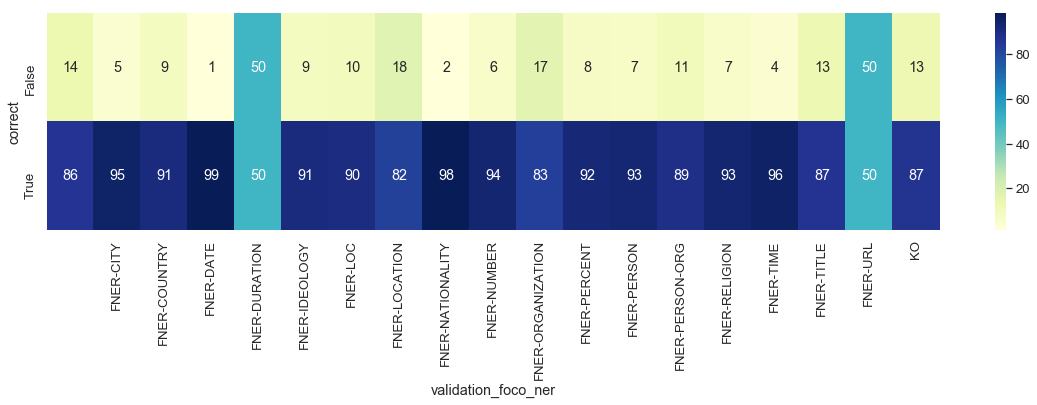

In [2699]:
COLUMN_PIVOT = 'validation_foco_ner'
COLUMN_CORRECT = 'correct'#_'+model

new_df[COLUMN_PIVOT] = new_df[COLUMN_PIVOT].apply(lambda x: x.replace('OK-','FNER-'))
new_df[COLUMN_PIVOT] = new_df[COLUMN_PIVOT].fillna('')

prev_pivot = new_df[['id',COLUMN_CORRECT, COLUMN_PIVOT]].groupby([COLUMN_CORRECT, COLUMN_PIVOT]).count().reset_index()
sum_pivot = new_df[['id', COLUMN_PIVOT]].groupby([COLUMN_PIVOT]).count().reset_index()
ids_con_errores = prev_pivot.loc[(prev_pivot[COLUMN_CORRECT] == False)&(prev_pivot['id'] > 0),COLUMN_PIVOT]
prev_pivot = prev_pivot.loc[prev_pivot[COLUMN_PIVOT].isin(ids_con_errores)]
for ids_err in ids_con_errores:
    prev_pivot.loc[(prev_pivot[COLUMN_PIVOT] == ids_err)&(prev_pivot[COLUMN_CORRECT] == False), 'porc'] = 100*prev_pivot.loc[(prev_pivot[COLUMN_PIVOT] == ids_err)&(prev_pivot[COLUMN_CORRECT] == False), 'id'].values[0] / sum_pivot.loc[sum_pivot[COLUMN_PIVOT] == ids_err,'id'].values[0]
    try:
        prev_pivot.loc[(prev_pivot[COLUMN_PIVOT] == ids_err)&(prev_pivot[COLUMN_CORRECT] == True), 'porc'] = 100*prev_pivot.loc[(prev_pivot[COLUMN_PIVOT] == ids_err)&(prev_pivot[COLUMN_CORRECT] == True), 'id'].values[0] / sum_pivot.loc[sum_pivot[COLUMN_PIVOT] == ids_err,'id'].values[0]
    except:
        pass
new_pivot = prev_pivot.pivot(index=COLUMN_CORRECT, columns=COLUMN_PIVOT, values='porc')
plt.figure(figsize=(20,4))
sns_heatmap = sns.heatmap(new_pivot, cmap="YlGnBu", yticklabels=new_pivot.index, xticklabels=new_pivot.columns, annot=True, fmt=".0f")
# annot=annot_pivot(new_pivot)
#sns_heatmap.set_title("Error " + model)

In [2700]:
new_df.columns

Index(['Unnamed: 0', 'id', 'query', 'answer', 'impossible', 'plausible',
       'dataset', 'context', 'query_ner', 'answer_ner', 'answer_ner_tags',
       'query_pos', 'answer_pos', 'foco', 'foco_norm', 'query_unigrams',
       'query_unigrams_pos', 'query_trigrams_pos', 'query_trigrams',
       'query_cuatrigrams_pos', 'query_cuatrigrams', 'answer_red_pos',
       'answer_pral_pos', 'validation_foco_ner', 'len_query', 'len_context',
       'len_answer', 'context_ner', 'phiyodr/bert-base-finetuned-squad2',
       'phiyodr/bert-large-finetuned-squad2', 'deepset/roberta-base-squad2',
       'phiyodr/roberta-large-finetuned-squad2', 'valhalla/t5-base-squad',
       'phiyodr/bert-base-finetuned-squad2_json',
       'score_phiyodr/bert-base-finetuned-squad2',
       'answer_model_phiyodr/bert-base-finetuned-squad2',
       'correct_phiyodr/bert-base-finetuned-squad2',
       'phiyodr/bert-large-finetuned-squad2_json',
       'score_phiyodr/bert-large-finetuned-squad2',
       'answer_model_

In [2720]:
import plotly.express as px
import plotly.figure_factory as ff

#fig = px.histogram(new_df, x="score_phiyodr/bert-base-finetuned-squad2", color="correct")
fig = ff.create_distplot([new_df['score_phiyodr/bert-base-finetuned-squad2'].fillna(0),
                                 new_df['score_phiyodr/bert-large-finetuned-squad2'].fillna(0),
                                 new_df['score_deepset/roberta-base-squad2'].fillna(0),
                                 new_df['score_phiyodr/roberta-large-finetuned-squad2'].fillna(0)]
                                , ['phiyodr/bert-base-finetuned-squad2',
                                     'phiyodr/bert-large-finetuned-squad2',
                                     'deepset/roberta-base-squad2',
                                     'phiyodr/roberta-large-finetuned-squad2'], show_rug=False, show_hist=False)
fig.show()

In [2730]:
pd.DataFrame({'score_phiyodr/bert-base-finetuned-squad2': new_df['score_phiyodr/bert-base-finetuned-squad2'],
               'score_phiyodr/bert-large-finetuned-squad2': new_df['score_phiyodr/bert-large-finetuned-squad2'],
                'score_deepset/roberta-base-squad2': new_df['score_deepset/roberta-base-squad2'],
                'score_phiyodr/roberta-large-finetuned-squad2': new_df['score_phiyodr/roberta-large-finetuned-squad2']}).describe()

score_phiyodr/bert-base-finetuned-squad2  \
count                              86821.000000   
mean                                   0.663040   
std                                    0.283556   
min                                    0.000000   
25%                                    0.461030   
50%                                    0.712210   
75%                                    0.931160   
max                                    0.999730   

       score_phiyodr/bert-large-finetuned-squad2  \
count                               86821.000000   
mean                                    0.784274   
std                                     0.246865   
min                                     0.000000   
25%                                     0.633290   
50%                                     0.893530   
75%                                     0.984350   
max                                     0.999980   

       score_deepset/roberta-base-squad2  \
count                       86821.000000   
mean                            0.620215   
std                             0.289234   
min                             0.000000   
25%                             0.404080   
50%                             0.651550   
75%                             0.895670   
max                             0.997250   

       score_phiyodr/roberta-large-finetuned-squad2  
count                                   86821.00000  
mean                                        0.75777  
std                                         0.26849  
min                                         0.00000  
25%                                         0.57049  
50%                                         0.87318  
75%                                         0.98766  
max                                         0.99996

In [2728]:
error_df = new_df.loc[new_df['correct']==False]

fig = ff.create_distplot([error_df['score_phiyodr/bert-base-finetuned-squad2'],
                                 error_df['score_phiyodr/bert-large-finetuned-squad2'],
                                 error_df['score_deepset/roberta-base-squad2'],
                                 error_df['score_phiyodr/roberta-large-finetuned-squad2']]
                                , ['error_score_phiyodr/bert-base-finetuned-squad2',
                                     'error_score_phiyodr/bert-large-finetuned-squad2',
                                     'error_score_deepset/roberta-base-squad2',
                                     'error_score_phiyodr/roberta-large-finetuned-squad2'], show_rug=False, show_hist=False)
fig.show()

In [2718]:
new_df['impossible'].value_counts()

False    86821
Name: impossible, dtype: int64

In [2729]:
pd.DataFrame({'score_phiyodr/bert-base-finetuned-squad2': error_df['score_phiyodr/bert-base-finetuned-squad2'],
               'score_phiyodr/bert-large-finetuned-squad2': error_df['score_phiyodr/bert-large-finetuned-squad2'],
                'score_deepset/roberta-base-squad2': error_df['score_deepset/roberta-base-squad2'],
                'score_phiyodr/roberta-large-finetuned-squad2': error_df['score_phiyodr/roberta-large-finetuned-squad2']}).describe()

score_phiyodr/bert-base-finetuned-squad2  \
count                               9686.000000   
mean                                   0.357598   
std                                    0.269317   
min                                    0.000000   
25%                                    0.129060   
50%                                    0.305350   
75%                                    0.536067   
max                                    0.998450   

       score_phiyodr/bert-large-finetuned-squad2  \
count                                9686.000000   
mean                                    0.524410   
std                                     0.306438   
min                                     0.000000   
25%                                     0.278945   
50%                                     0.524075   
75%                                     0.789532   
max                                     0.999840   

       score_deepset/roberta-base-squad2  \
count                        9686.000000   
mean                            0.306101   
std                             0.246493   
min                             0.000000   
25%                             0.099775   
50%                             0.253920   
75%                             0.466332   
max                             0.992900   

       score_phiyodr/roberta-large-finetuned-squad2  
count                                   9686.000000  
mean                                       0.488290  
std                                        0.310633  
min                                        0.000000  
25%                                        0.226175  
50%                                        0.467200  
75%                                        0.750292  
max                                        0.999850

In [2732]:
squad_train['num_common_terms'] = squad_train.apply(lambda x: len(set(get_word_pos(x['query_pos'].lower())).intersection(set(get_word_pos(x['context_pos'].lower())))), axis=1)

In [2753]:
squad_train = squad_train.merge(new_df[['id', 'correct']], how='left', on='id')

In [2754]:
squad_train['correct'].value_counts()

True     77135
False     9686
Name: correct, dtype: int64

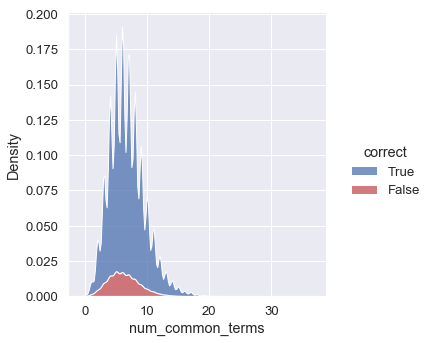

In [2760]:
#error_df = new_df.loc[new_df['correct']==False]

#fig = ff.create_distplot([squad_train['num_common_terms']], 
#                          ['common_terms_query_context'],
#                         show_rug=False)
#fig.show()

sns.displot(squad_train, x="num_common_terms", hue="correct", kind="kde",multiple="stack", palette=palette, hue_order=[True, False])

In [2765]:
squad_train['num_common_terms'].describe()

count    130319.000000
mean          6.564123
std           2.813979
min           0.000000
25%           5.000000
50%           6.000000
75%           8.000000
max          36.000000
Name: num_common_terms, dtype: float64